<a href="https://colab.research.google.com/github/mohamed-bouchalkha/ligue1-match-prediction-Project/blob/main/Prediction_Ligue1_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ⚽ **Prédiction des Résultats de Ligue 1 (Saison 2023-2024)**

*Objectif :* Construire un modèle de classification pour prédire les résultats des matchs de Ligue 1 (victoire à domicile, nul, ou victoire à l'extérieur) en utilisant des données historiques et des statistiques sur les joueurs et les clubs. Le but est de produire des prédictions fiables pour la saison 2023-2024 à partir de données disponibles jusqu'à 2022.


# **Importation des bibliothèques python**:

In [21]:
from google.colab import drive
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/ColabDatasets/Ligue1_Prediction/'
# Lire les datasets
df_match_hist = pd.read_csv(base_path + "matchs_2013_2022.csv")
df_match_2023 = pd.read_csv(base_path + "match_2023.csv")
df_clubs = pd.read_csv(base_path + "clubs_fr.csv")
df_valuations = pd.read_csv(base_path + "player_valuation_before_season.csv")
df_appearance = pd.read_csv(base_path + "player_appearance.csv")
df_lineups = pd.read_csv(base_path + "game_lineups.csv")
df_events = pd.read_csv(base_path + "game_events.csv")
df_sample = pd.read_csv(base_path + "sample_results.csv")
df_prediction_ex = pd.read_csv(base_path + "prediction_example.csv")


Mounted at /content/drive


<ipython-input-3-6e15647f7d8b>:9: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lineups = pd.read_csv(base_path + "game_lineups.csv")


In [ ]:
# Afficher les informations sur chaque DataFrame
print("📘 df_match_hist")
df_match_hist.info()
print("\n📘 df_match_2023")
df_match_2023.info()
print("\n📘 df_clubs")
df_clubs.info()
print("\n📘 df_valuations")
df_valuations.info()
print("\n📘 df_appearance")
df_appearance.info()
print("\n📘 df_lineups")
df_lineups.info()
print("\n📘 df_events")
df_events.info()
print("\n📘 df_sample")
df_sample.info()
print("\n📘 df_prediction_ex")
df_prediction_ex.info()


📘 df_match_hist
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4078 non-null   int64  
 1   game_id                 4078 non-null   int64  
 2   season                  4078 non-null   int64  
 3   round                   4078 non-null   object 
 4   date                    4078 non-null   object 
 5   home_club_id            4078 non-null   int64  
 6   away_club_id            4078 non-null   int64  
 7   home_club_goals         4078 non-null   int64  
 8   away_club_goals         4078 non-null   int64  
 9   home_club_position      4078 non-null   float64
 10  away_club_position      4078 non-null   float64
 11  home_club_manager_name  4078 non-null   object 
 12  away_club_manager_name  4078 non-null   object 
 13  stadium                 4078 non-null   object 
 14  attendance              

## **I- ANALYSE EXPLORATOIRE DES DONNÉES**




1. Analyse exploratoire de `matchs_2013_2022.csv`
2. Analyse exploratoire de `match_2023.csv`
3. Analyse exploratoire de `clubs_fr.csv`
4. Analyse exploratoire de `player_valuation_before_season.csv`
5. Analyse exploratoire de `player_appearance.csv`
6. Analyse exploratoire de `game_lineups.csv`
7. Analyse exploratoire de `game_events.csv`
8. Analyse exploratoire de `sample_results.csv`
9. Analyse exploratoire de `prediction_example.csv`


# **I.1. Analyse Exploratoire de `matchs_2013_2022.csv`**

In [ ]:
print("="*80)
print("EXPLORATION DES MATCHS HISTORIQUES (2013-2022)")
print("="*80)

# 1. APERÇU DE BASE DU DATASET
print("\n1. APERÇU DES DONNÉES\n")
print("Dimensions:", df_match_hist.shape)
print("\nPremières lignes:")
print(df_match_hist.head())
print("\nTypes de données:")
print(df_match_hist.dtypes)
print("\nStatistiques descriptives:")
print(df_match_hist.describe())
print("\nValeurs manquantes:")
print(df_match_hist.isnull().sum())

# 2. ANALYSE TEMPORELLE
print("\n" + "="*80)
print("2. ANALYSE TEMPORELLE")
print("="*80)

# Convertir les dates en format datetime
df_match_hist['date'] = pd.to_datetime(df_match_hist['date'])

# Distribution des matchs par saison
season_counts = df_match_hist['season'].value_counts().sort_index()
print("\nNombre de matchs par saison:")
print(season_counts)


EXPLORATION DES MATCHS HISTORIQUES (2013-2022)

1. APERÇU DES DONNÉES

Dimensions: (4078, 24)

Premières lignes:
   Unnamed: 0  game_id  season         round       date  home_club_id  \
0          12  2330874    2013   8. Matchday 2013-09-28           618   
1          13  2330880    2013  10. Matchday 2013-10-19         14171   
2          14  2330916    2013  15. Matchday 2013-11-30          1423   
3          15  2331018    2013  21. Matchday 2014-01-18           273   
4          16  2331034    2013  24. Matchday 2014-02-08          1147   

   away_club_id  home_club_goals  away_club_goals  home_club_position  ...  \
0           595                2                2                 6.0  ...   
1           855                1                2                16.0  ...   
2          1082                0                1                18.0  ...   
3         14171                0                0                15.0  ...   
4           273                3                1         


Distribution des matchs par jour de la semaine:
day_of_week
Saturday     1767
Sunday       1530
Friday        365
Wednesday     326
Tuesday        70
Thursday       14
Monday          6
Name: count, dtype: int64


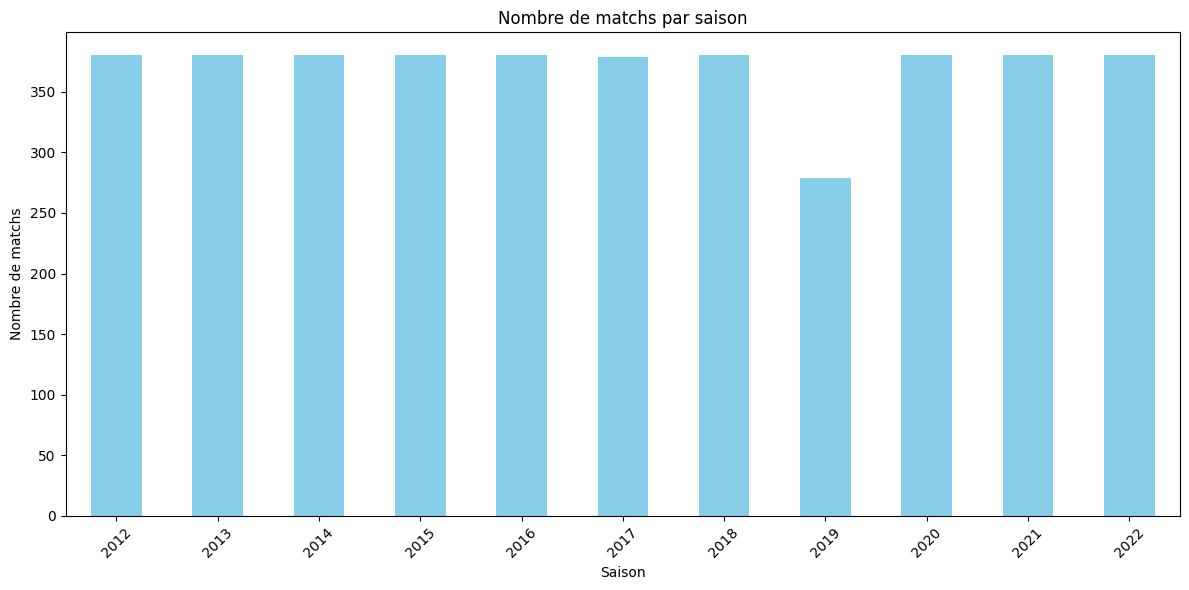

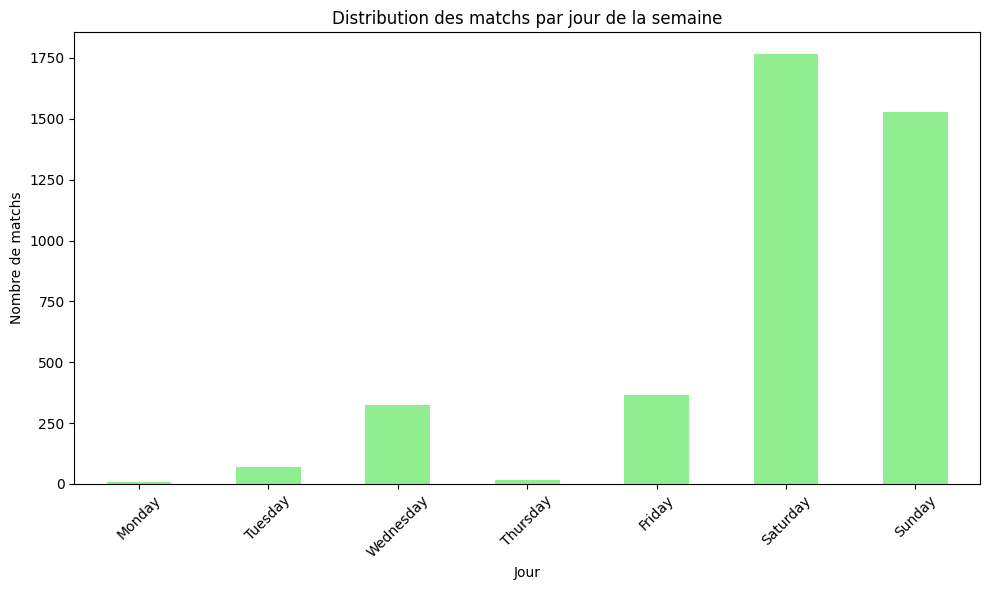

In [ ]:
plt.figure(figsize=(12, 6))
season_counts.plot(kind='bar', color='skyblue')
plt.title('Nombre de matchs par saison')
plt.xlabel('Saison')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('matches_per_season.png')
# Distribution des matchs par jour de la semaine
df_match_hist['day_of_week'] = df_match_hist['date'].dt.day_name()
day_counts = df_match_hist['day_of_week'].value_counts()
print("\nDistribution des matchs par jour de la semaine:")
print(day_counts)



plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution des matchs par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)
plt.tight_layout()


3. ANALYSE DES RÉSULTATS

Distribution des résultats:
Victoire domicile (1): 1802
Match nul (0): 1073
Victoire extérieur (-1): 1203


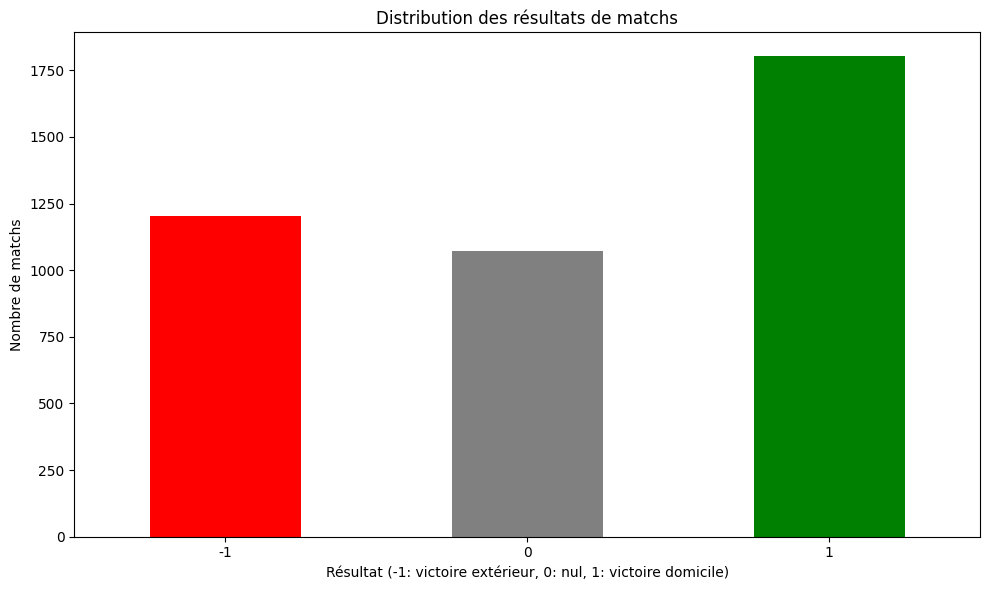

In [ ]:
# 3. ANALYSE DES RÉSULTATS
print("\n" + "="*80)
print("3. ANALYSE DES RÉSULTATS")
print("="*80)

# Distribution des résultats
result_counts = df_match_hist['results'].value_counts().sort_index()
print("\nDistribution des résultats:")
print(f"Victoire domicile (1): {result_counts.get(1, 0)}")
print(f"Match nul (0): {result_counts.get(0, 0)}")
print(f"Victoire extérieur (-1): {result_counts.get(-1, 0)}")
plt.figure(figsize=(10, 6))
result_counts.plot(kind='bar', color=['red', 'gray', 'green'])
plt.title('Distribution des résultats de matchs')
plt.xlabel('Résultat (-1: victoire extérieur, 0: nul, 1: victoire domicile)')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=0)
plt.tight_layout()


Moyenne de buts marqués par match:
Équipe à domicile: 1.4759686120647375
Équipe à l'extérieur: 1.1436978911230995
Total: 2.619666503187837


Text(0, 0.5, 'Fréquence')

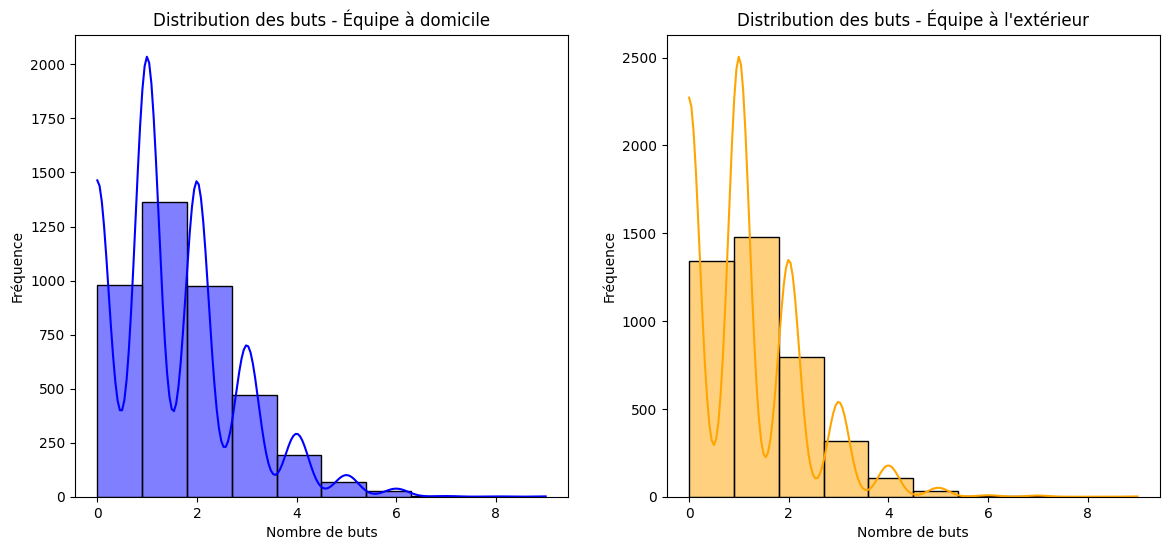

In [ ]:
# Moyenne de buts marqués par match
print("\nMoyenne de buts marqués par match:")
print("Équipe à domicile:", df_match_hist['home_club_goals'].mean())
print("Équipe à l'extérieur:", df_match_hist['away_club_goals'].mean())
print("Total:", df_match_hist['home_club_goals'].mean() + df_match_hist['away_club_goals'].mean())

# Distribution des buts
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df_match_hist['home_club_goals'], kde=True, color='blue', bins=10)
plt.title('Distribution des buts - Équipe à domicile')
plt.xlabel('Nombre de buts')
plt.ylabel('Fréquence')

plt.subplot(1, 2, 2)
sns.histplot(df_match_hist['away_club_goals'], kde=True, color='orange', bins=10)
plt.title('Distribution des buts - Équipe à l\'extérieur')
plt.xlabel('Nombre de buts')
plt.ylabel('Fréquence')


4. ANALYSE DES ÉQUIPES

Nombre de matchs par équipe:
                                               Home  Away  Total
Olympique de Marseille                          204   204    408
Lille Olympique Sporting Club Lille Métropole   205   203    408
Stade Rennais Football Club                     204   204    408
Montpellier Hérault Sport Club                  204   204    408
Olympique Gymnaste Club Nice Côte d'Azur        205   203    408
Paris Saint-Germain Football Club               204   203    407
Olympique Lyonnais                              203   204    407
Football Club de Nantes                         185   185    370
FC Girondins Bordeaux                           184   186    370
Association sportive de Monaco Football Club    185   185    370


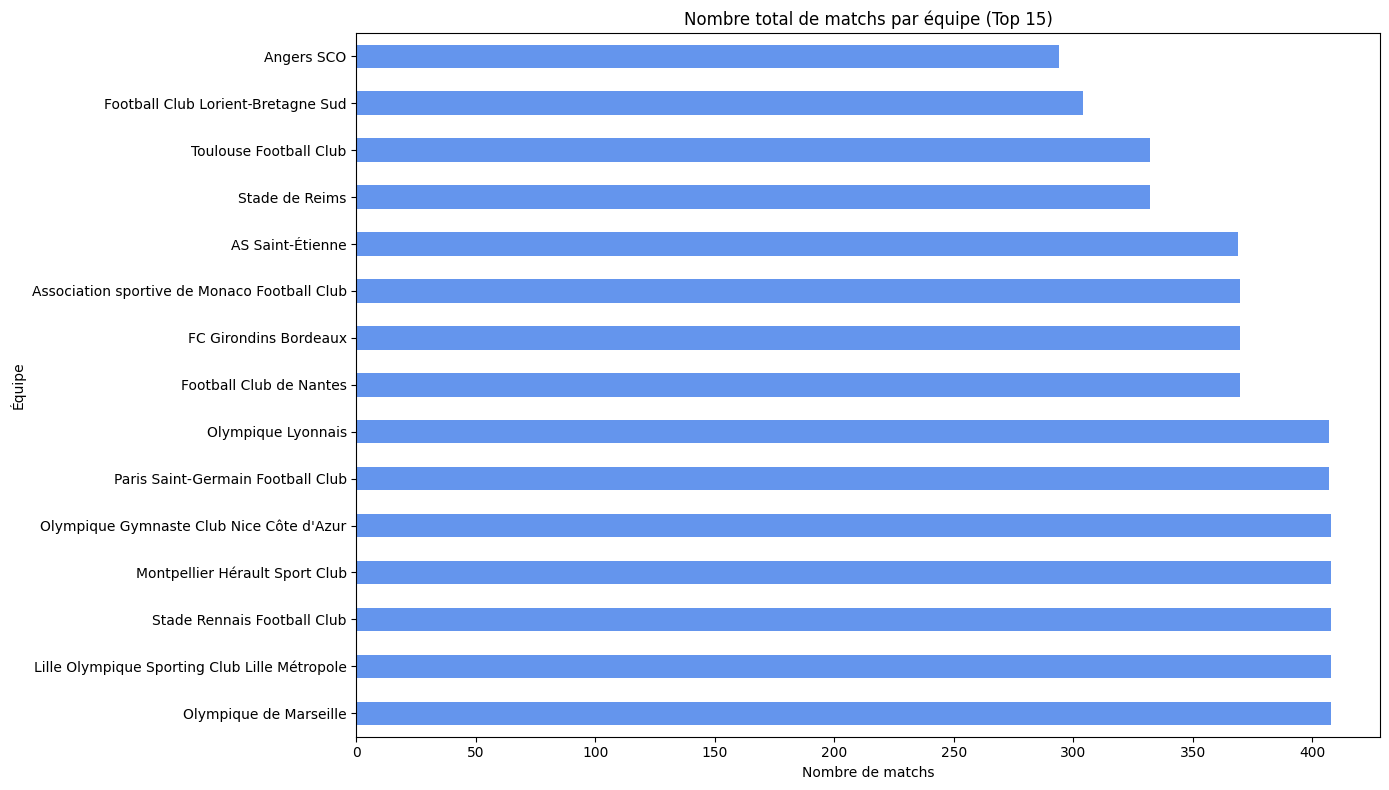

In [ ]:
# 4. ANALYSE DES ÉQUIPES
print("\n" + "="*80)
print("4. ANALYSE DES ÉQUIPES")
print("="*80)

# Nombre de matchs par équipe
home_team_counts = df_match_hist['home_club_name'].value_counts()
away_team_counts = df_match_hist['away_club_name'].value_counts()
total_team_counts = pd.DataFrame({
    'Home': home_team_counts,
    'Away': away_team_counts
}).fillna(0)
total_team_counts['Total'] = total_team_counts['Home'] + total_team_counts['Away']
total_team_counts = total_team_counts.sort_values('Total', ascending=False)

print("\nNombre de matchs par équipe:")
print(total_team_counts.head(10))

# Visualisation du nombre de matchs par équipe
plt.figure(figsize=(14, 8))
total_team_counts['Total'].head(15).plot(kind='barh', color='cornflowerblue')
plt.title('Nombre total de matchs par équipe (Top 15)')
plt.xlabel('Nombre de matchs')
plt.ylabel('Équipe')
plt.tight_layout()

In [ ]:
# 5. PERFORMANCES DES ÉQUIPES
print("\n" + "="*80)
print("5. PERFORMANCES DES ÉQUIPES")
print("="*80)

# Performances à domicile
home_team_performance = pd.DataFrame()
for team in df_match_hist['home_club_name'].unique():
    team_matches = df_match_hist[df_match_hist['home_club_name'] == team]
    total_matches = len(team_matches)
    wins = len(team_matches[team_matches['results'] == 1])
    draws = len(team_matches[team_matches['results'] == 0])
    losses = len(team_matches[team_matches['results'] == -1])

    home_team_performance = pd.concat([home_team_performance, pd.DataFrame({
        'Team': [team],
        'TotalMatches': [total_matches],
        'Wins': [wins],
        'WinRate': [wins / total_matches if total_matches > 0 else 0],
        'Draws': [draws],
        'DrawRate': [draws / total_matches if total_matches > 0 else 0],
        'Losses': [losses],
        'LossRate': [losses / total_matches if total_matches > 0 else 0],
        'GoalsScored': [team_matches['home_club_goals'].sum()],
        'GoalsConceded': [team_matches['away_club_goals'].sum()],
        'GoalDifference': [team_matches['home_club_goals'].sum() - team_matches['away_club_goals'].sum()]
    })], ignore_index=True)

# Trier par taux de victoire
home_team_performance = home_team_performance.sort_values('WinRate', ascending=False)

print("\nPerformances des équipes à domicile (Top 10):")
print(home_team_performance[['Team', 'TotalMatches', 'WinRate', 'DrawRate', 'LossRate']].head(10))

# Performances à l'extérieur
away_team_performance = pd.DataFrame()
for team in df_match_hist['away_club_name'].unique():
    team_matches = df_match_hist[df_match_hist['away_club_name'] == team]
    total_matches = len(team_matches)
    wins = len(team_matches[team_matches['results'] == -1])
    draws = len(team_matches[team_matches['results'] == 0])
    losses = len(team_matches[team_matches['results'] == 1])

    away_team_performance = pd.concat([away_team_performance, pd.DataFrame({
        'Team': [team],
        'TotalMatches': [total_matches],
        'Wins': [wins],
        'WinRate': [wins / total_matches if total_matches > 0 else 0],
        'Draws': [draws],
        'DrawRate': [draws / total_matches if total_matches > 0 else 0],
        'Losses': [losses],
        'LossRate': [losses / total_matches if total_matches > 0 else 0],
        'GoalsScored': [team_matches['away_club_goals'].sum()],
        'GoalsConceded': [team_matches['home_club_goals'].sum()],
        'GoalDifference': [team_matches['away_club_goals'].sum() - team_matches['home_club_goals'].sum()]
    })], ignore_index=True)

# Trier par taux de victoire
away_team_performance = away_team_performance.sort_values('WinRate', ascending=False)

print("\nPerformances des équipes à l'extérieur (Top 10):")
print(away_team_performance[['Team', 'TotalMatches', 'WinRate', 'DrawRate', 'LossRate']].head(10))



5. PERFORMANCES DES ÉQUIPES

Performances des équipes à domicile (Top 10):
                                             Team  TotalMatches   WinRate  \
20              Paris Saint-Germain Football Club           204  0.779412   
17                             Olympique Lyonnais           203  0.581281   
9    Association sportive de Monaco Football Club           185  0.578378   
5                          Olympique de Marseille           204  0.544118   
24  Lille Olympique Sporting Club Lille Métropole           205  0.531707   
8        Olympique Gymnaste Club Nice Côte d'Azur           205  0.512195   
12                            Racing Club de Lens            76  0.500000   
3                     Stade Rennais Football Club           204  0.480392   
0                                AS Saint-Étienne           184  0.467391   
11                                      SC Bastia            95  0.452632   

    DrawRate  LossRate  
20  0.147059  0.073529  
17  0.221675  0.197044  
9


6. ANALYSE DES FORMATIONS TACTIQUES

Formations les plus utilisées à domicile:
home_club_formation
4-2-3-1            1082
4-3-3 Attacking     762
4-4-2 double 6      469
4-1-4-1             225
4-3-1-2             190
4-4-2               150
5-3-2               148
3-4-1-2             106
3-4-2-1              97
5-4-1                87
Name: count, dtype: int64

Formations les plus utilisées à l'extérieur:
away_club_formation
4-2-3-1            1018
4-3-3 Attacking     773
4-4-2 double 6      366
4-1-4-1             261
5-3-2               192
4-3-1-2             166
4-4-2               147
5-4-1               130
3-4-1-2             112
3-4-2-1             107
Name: count, dtype: int64


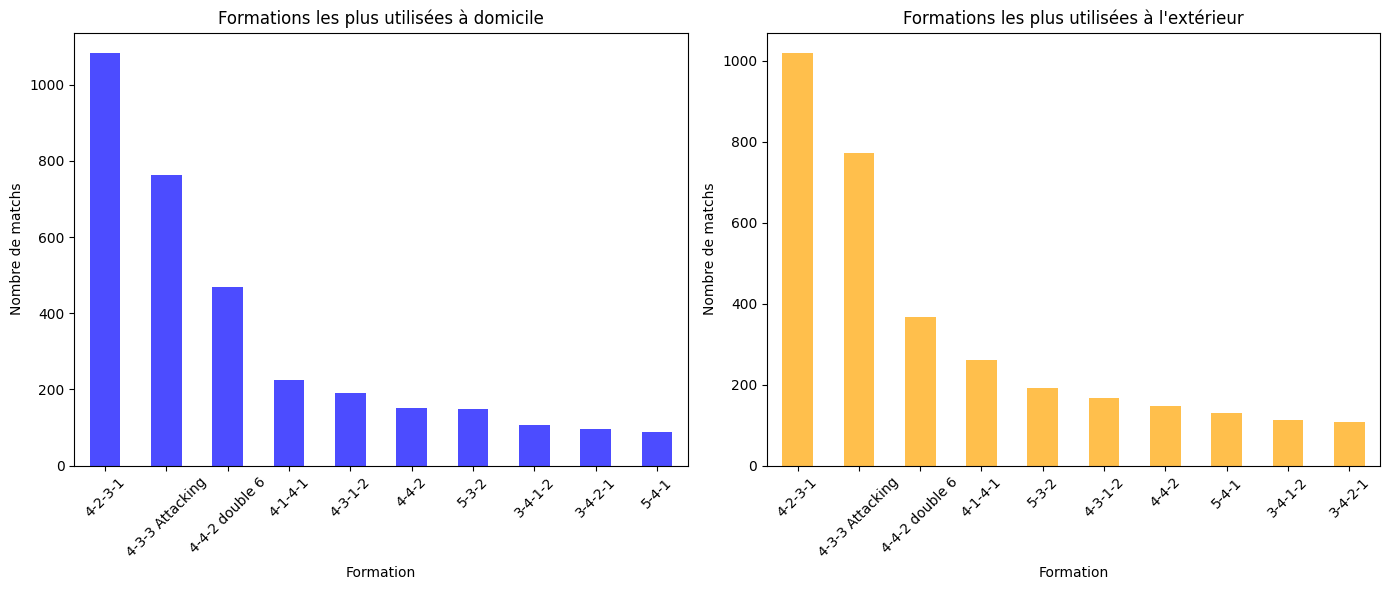

In [ ]:
# 6. ANALYSE DES FORMATIONS TACTIQUES
print("\n" + "="*80)
print("6. ANALYSE DES FORMATIONS TACTIQUES")
print("="*80)

# Formations les plus utilisées à domicile
home_formations = df_match_hist['home_club_formation'].value_counts().head(10)
print("\nFormations les plus utilisées à domicile:")
print(home_formations)

# Formations les plus utilisées à l'extérieur
away_formations = df_match_hist['away_club_formation'].value_counts().head(10)
print("\nFormations les plus utilisées à l'extérieur:")
print(away_formations)

# Visualisation des formations
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
home_formations.plot(kind='bar', color='blue', alpha=0.7)
plt.title('Formations les plus utilisées à domicile')
plt.xlabel('Formation')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
away_formations.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Formations les plus utilisées à l\'extérieur')
plt.xlabel('Formation')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)

plt.tight_layout()


7. CORRÉLATIONS ENTRE VARIABLES


<ipython-input-19-8d3151373415>:20: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
<ipython-input-19-8d3151373415>:21: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.savefig(base_path + "correlation_matrix.png")
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


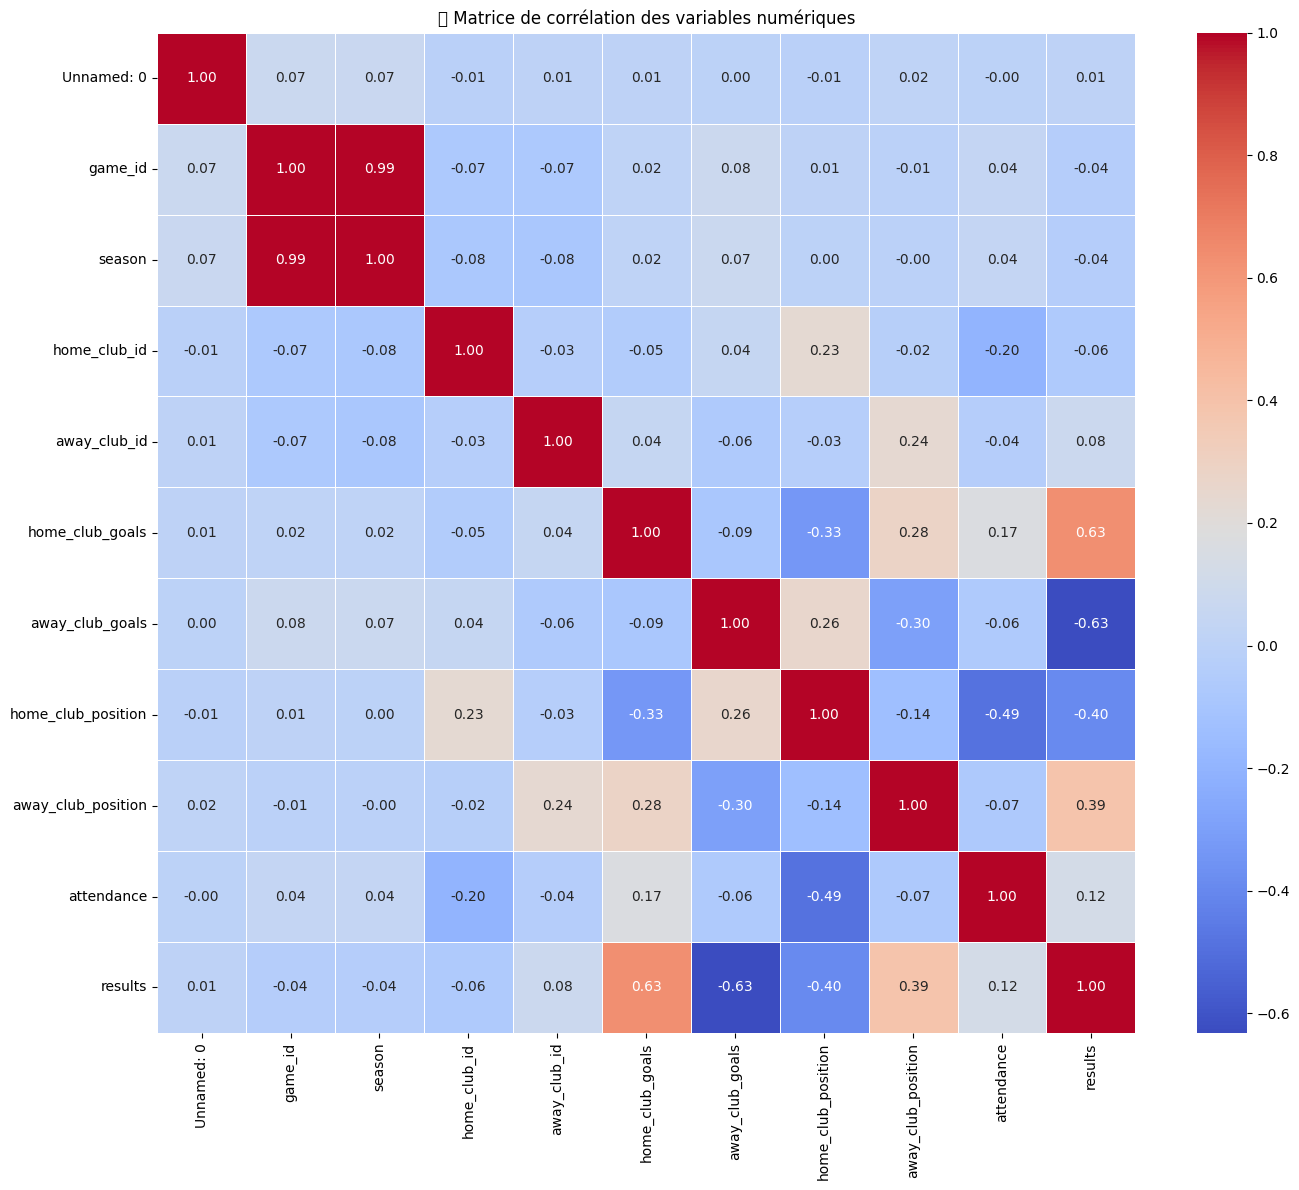


✅ Tableau complet des corrélations (ou type non numérique) :
                  Variable Correlation_with_results
0               Unnamed: 0                   0.0116
1                  game_id                  -0.0385
2                   season                  -0.0372
3                    round            Non numérique
4                     date            Non numérique
5             home_club_id                  -0.0633
6             away_club_id                   0.0808
7          home_club_goals                   0.6314
8          away_club_goals                  -0.6322
9       home_club_position                  -0.3956
10      away_club_position                   0.3928
11  home_club_manager_name            Non numérique
12  away_club_manager_name            Non numérique
13                 stadium            Non numérique
14              attendance                   0.1229
15                 referee            Non numérique
16     home_club_formation            Non numérique
17

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 7. CORRÉLATIONS ENTRE VARIABLES
print("\n" + "="*80)
print("7. CORRÉLATIONS ENTRE VARIABLES")
print("="*80)

# Sélection des colonnes numériques
numeric_columns = df_match_hist.select_dtypes(include=['int64', 'float64']).columns

# Matrice de corrélation
correlation_matrix = df_match_hist[numeric_columns].corr()

# 🔍 Affichage de la matrice de corrélation complète en heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('🔍 Matrice de corrélation des variables numériques')
plt.tight_layout()
plt.savefig(base_path + "correlation_matrix.png")
plt.show()

# Liste de toutes les colonnes
all_columns = df_match_hist.columns.tolist()

# Obtenir corrélations uniquement pour colonnes numériques
corr_numeric = df_match_hist.select_dtypes(include=['int64', 'float64']).corr()['results']

# Construction du tableau complet
correlation_results = []
for col in all_columns:
    if col == 'results':
        continue
    if col in corr_numeric:
        correlation_results.append({'Variable': col, 'Correlation_with_results': round(corr_numeric[col], 4)})
    else:
        correlation_results.append({'Variable': col, 'Correlation_with_results': 'Non numérique'})

# Transformation en DataFrame
correlation_table_full = pd.DataFrame(correlation_results)

# Affichage
print("\n✅ Tableau complet des corrélations (ou type non numérique) :")
print(correlation_table_full)



## Autre approche avec l'encodage des variables non numeriques avec `OrdinalEncoder`

<ipython-input-18-9c5151ff34a9>:29: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


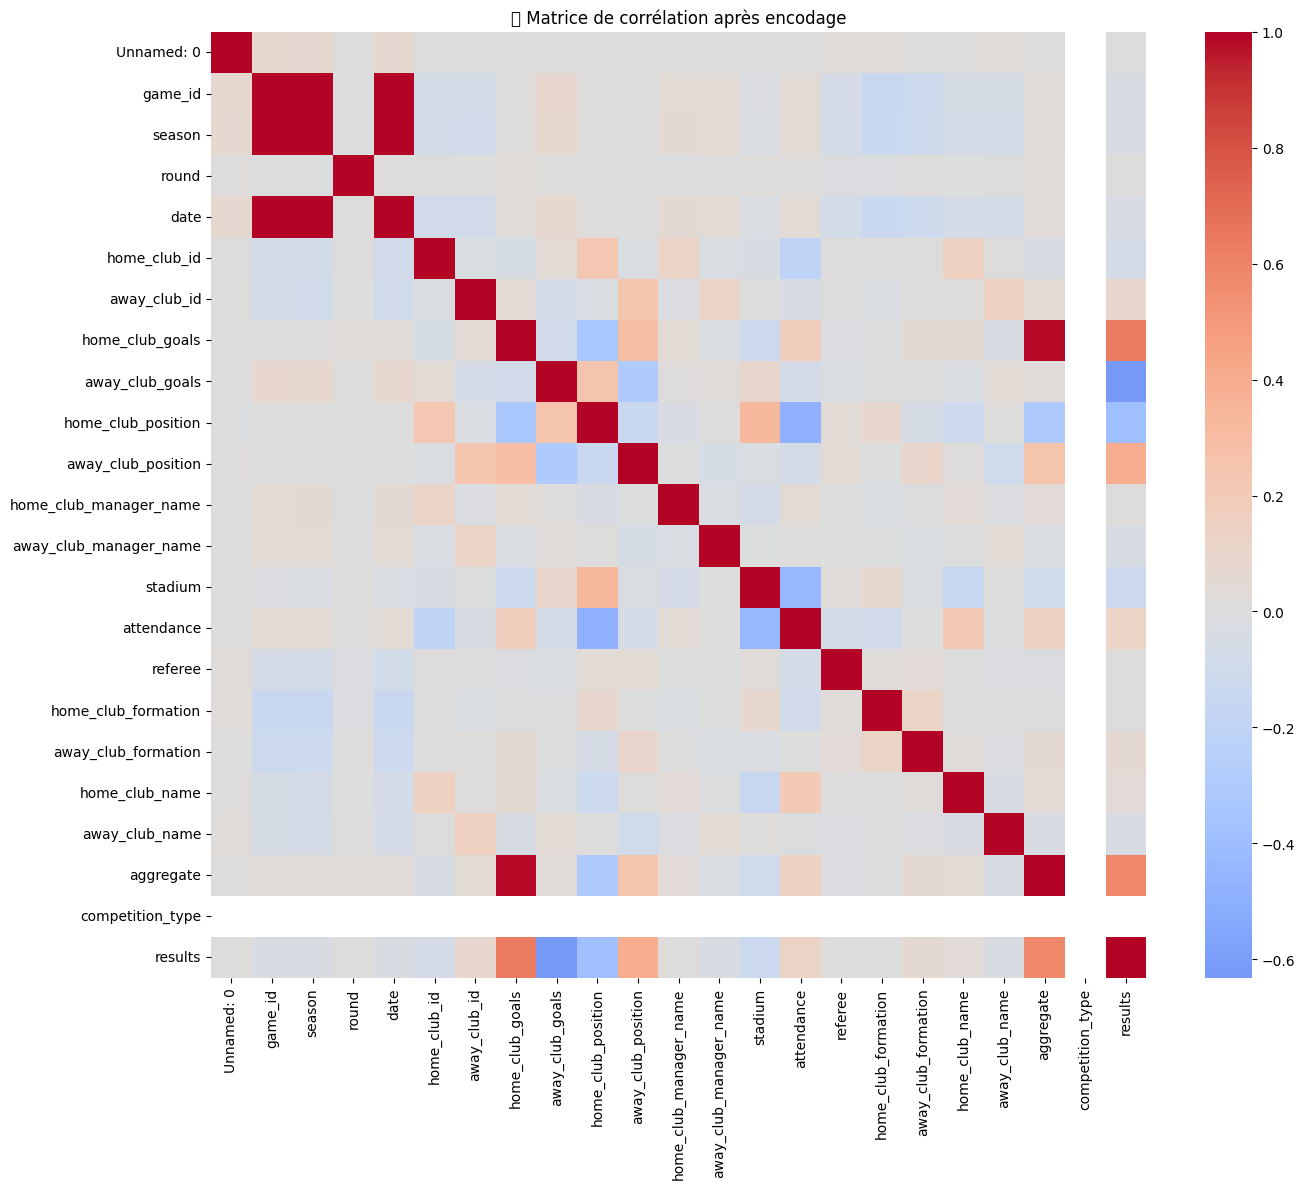


✅ Tableau complet des corrélations (après encodage) :


,Variable,Correlation_with_results
0,Unnamed: 0,0.0116
1,game_id,-0.0385
2,season,-0.0372
3,round,0.0135
4,date,-0.0373
5,home_club_id,-0.0633
6,away_club_id,0.0808
7,home_club_goals,0.6314
8,away_club_goals,-0.6322
9,home_club_position,-0.3956


from matplotlib import pyplot as plt
correlation_df_full['Correlation_with_results'].plot(kind='hist', bins=20, title='Correlation_with_results')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_df_full['Correlation_with_results'].plot(kind='line', figsize=(8, 4), title='Correlation_with_results')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Copier le dataset
df_encoded = df_match_hist.copy()

# 2. Identifier les colonnes non numériques
non_numeric_cols = df_encoded.select_dtypes(include=['object']).columns.tolist()
# 3. Encoder les colonnes non numériques avec OrdinalEncoder
encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
df_encoded[non_numeric_cols] = encoder.fit_transform(df_encoded[non_numeric_cols])

# 4. Calculer la matrice de corrélation
correlation_matrix = df_encoded.corr(numeric_only=True)

# 5. Extraire la colonne des corrélations avec 'results'
corr_with_target = correlation_matrix['results'].drop('results').sort_values(ascending=False)

# 6. Affichage du heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("✅ Matrice de corrélation après encodage")
plt.tight_layout()
plt.show()

# 7. Créer le tableau final : toutes les colonnes avec leurs corrélations ou une note
result_table = []
for col in df_match_hist.columns:
    if col == 'results':
        continue
    if col in correlation_matrix.columns:
        corr_value = round(correlation_matrix.at[col, 'results'], 4)
        result_table.append({'Variable': col, 'Correlation_with_results': corr_value})
    else:
        result_table.append({'Variable': col, 'Correlation_with_results': 'Non numérique (ignorée)'})

# 8. Affichage du tableau des corrélations complet
correlation_df_full = pd.DataFrame(result_table)
print("\n✅ Tableau complet des corrélations (après encodage) :")
display(correlation_df_full)


<h3>🔍 Interprétation de la matrice de corrélation</h3>

<table>
  <thead>
    <tr>
      <th>Variable</th>
      <th>Corrélation avec <code>results</code></th>
      <th>Interprétation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><code>home_club_goals</code></td>
      <td>+0.63</td>
      <td>Corrélation forte positive – Plus l’équipe à domicile marque, plus elle a de chances de gagner.</td>
    </tr>
    <tr>
      <td><code>away_goals</code></td>
      <td>-0.63</td>
      <td>Corrélation forte négative – Plus l’équipe adverse marque, moins l’équipe à domicile gagne.</td>
    </tr>
    <tr>
      <td><code>home_club_position</code></td>
      <td>-0.40</td>
      <td>Corrélation modérée – Une meilleure position du club à domicile est liée à de meilleurs résultats.</td>
    </tr>
    <tr>
      <td><code>away_club_position</code></td>
      <td>+0.39</td>
      <td>Corrélation modérée – Une mauvaise position du club adverse favorise l’équipe à domicile.</td>
    </tr>
    <tr>
      <td><code>Unnamed: 0</code>, <code>game_id</code>, <code>season</code>, <code>home_club_id</code>, <code>away_club_id</code>, <code>attendance</code></td>
      <td>≈ 0</td>
      <td>Corrélation très faible – Ces variables peuvent être supprimées pour simplifier le modèle.</td>
    </tr>
  </tbody>
</table>


# **I.2. Analyse Exploratoire de `match_2023.csv`**

In [ ]:
print("="*80)
print("EXPLORATION DES MATCHS À PRÉDIRE (2023)")
print("="*80)

# 1. APERÇU DE BASE DU DATASET
print("\n1. APERÇU DES DONNÉES\n")
print("Dimensions:", df_match_2023.shape)
print("\nPremières lignes:")
print(df_match_2023.head())
print("\nTypes de données:")
print(df_match_2023.dtypes)
print("\nStatistiques descriptives:")
print(df_match_2023.describe())
print("\nValeurs manquantes:")
print(df_match_2023.isnull().sum())

EXPLORATION DES MATCHS À PRÉDIRE (2023)

1. APERÇU DES DONNÉES

Dimensions: (270, 12)

Premières lignes:
   game_id        date  home_club_id  away_club_id home_club_manager_name  \
0  4094596  2023-08-26           583           826           Luis Enrique   
1  4094622  2023-09-16           826           347           Franck Haise   
2  4094630  2023-09-24           969           273    Michel Der Zakarian   
3  4094647  2023-10-07           347           417          László Bölöni   
4  4094696  2023-12-03           244           273        Gennaro Gattuso   

  away_club_manager_name                 stadium  attendance  \
0           Franck Haise        Parc des Princes     47000.0   
1          László Bölöni  Stade Bollaert-Delelis     37988.0   
2          Bruno Génésio      Stade de la Mosson     15430.0   
3      Francesco Farioli  Stade Saint-Symphorien     23160.0   
4         Julien Stéphan        Orange Vélodrome     54162.0   

              referee                     home_


2. ANALYSE TEMPORELLE

Distribution des matchs par mois:
month_name
August       27.0
September    30.0
October      31.0
November     27.0
December     38.0
January      18.0
February     36.0
March        36.0
April        27.0
May           NaN
Name: count, dtype: float64

Distribution des matchs par jour de la semaine:
day_of_week
Sunday       167
Saturday      58
Friday        29
Wednesday     14
Thursday       1
Tuesday        1
Name: count, dtype: int64


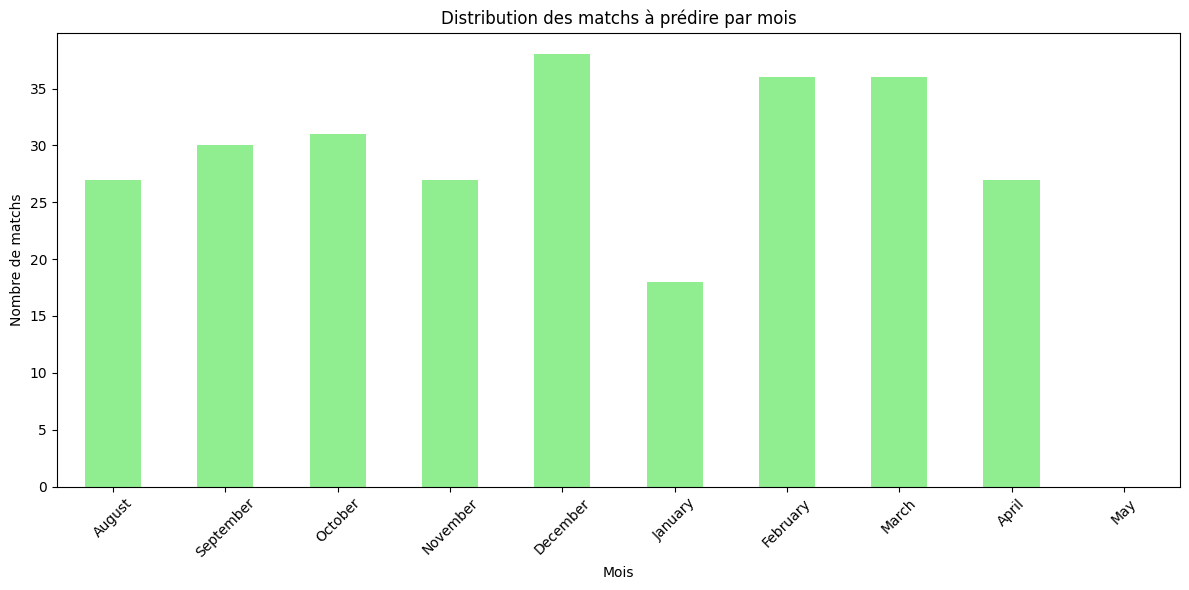

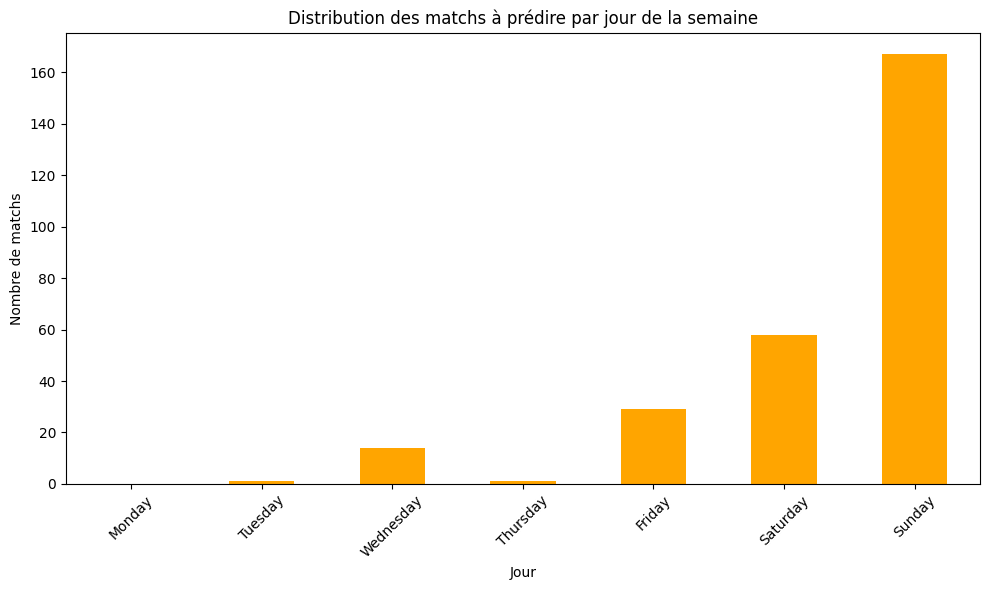

In [ ]:
# 2. ANALYSE TEMPORELLE
print("\n" + "="*80)
print("2. ANALYSE TEMPORELLE")
print("="*80)

# Convertir les dates en format datetime
df_match_2023['date'] = pd.to_datetime(df_match_2023['date'])

# Distribution des matchs par mois
df_match_2023['month'] = df_match_2023['date'].dt.month
df_match_2023['month_name'] = df_match_2023['date'].dt.month_name()
month_counts = df_match_2023['month_name'].value_counts().reindex(['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'])
print("\nDistribution des matchs par mois:")
print(month_counts)

plt.figure(figsize=(12, 6))
month_counts.plot(kind='bar', color='lightgreen')
plt.title('Distribution des matchs à prédire par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)
plt.tight_layout()
# Distribution des matchs par jour de la semaine
df_match_2023['day_of_week'] = df_match_2023['date'].dt.day_name()
day_counts = df_match_2023['day_of_week'].value_counts()
print("\nDistribution des matchs par jour de la semaine:")
print(day_counts)

plt.figure(figsize=(10, 6))
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = day_counts.reindex(day_order)
day_counts.plot(kind='bar', color='orange')
plt.title('Distribution des matchs à prédire par jour de la semaine')
plt.xlabel('Jour')
plt.ylabel('Nombre de matchs')
plt.xticks(rotation=45)
plt.tight_layout()



6. ANALYSE DES ÉQUIPES PARTICULIÈRES

Matchs impliquant Le Havre (à prédire):
         date                  home_club_name  \
26 2023-08-13  Montpellier Hérault Sport Club   
38 2023-09-03          Le Havre Athletic Club   
41 2024-04-14          Le Havre Athletic Club   
48 2023-11-26         Football Club de Nantes   
49 2023-09-17              Olympique Lyonnais   

                        away_club_name  
26              Le Havre Athletic Club  
38  Football Club Lorient-Bretagne Sud  
41             Football Club de Nantes  
48              Le Havre Athletic Club  
49              Le Havre Athletic Club  
Nombre total de matchs avec Le Havre: 30


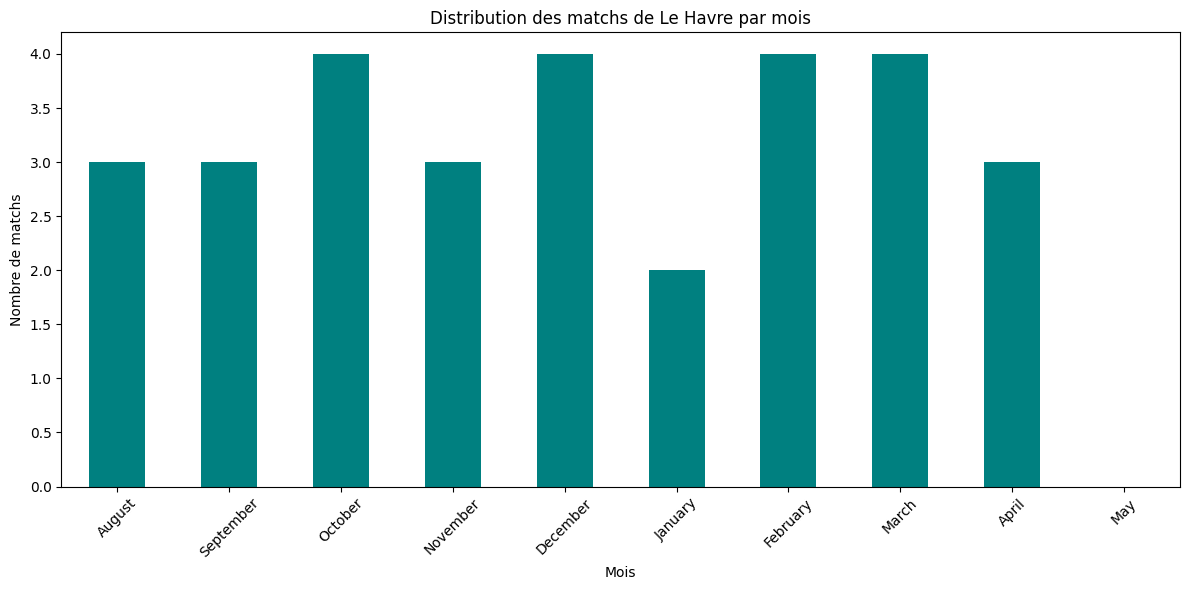

In [ ]:
# 6. ANALYSE DES ÉQUIPES PARTICULIÈRES
print("\n" + "="*80)
print("6. ANALYSE DES ÉQUIPES PARTICULIÈRES")
print("="*80)

# Identifier Le Havre et autres équipes nouvelles dans les matchs à prédire
le_havre_matches = df_match_2023[
    (df_match_2023['home_club_name'] == 'Le Havre Athletic Club') |
    (df_match_2023['away_club_name'] == 'Le Havre Athletic Club')
]

print("\nMatchs impliquant Le Havre (à prédire):")
print(le_havre_matches[['date', 'home_club_name', 'away_club_name']].head())
print(f"Nombre total de matchs avec Le Havre: {len(le_havre_matches)}")

# Distribution des matchs de Le Havre par mois
if len(le_havre_matches) > 0:
    le_havre_month_counts = le_havre_matches['month_name'].value_counts().reindex(['August', 'September', 'October', 'November', 'December', 'January', 'February', 'March', 'April', 'May'])

    plt.figure(figsize=(12, 6))
    le_havre_month_counts.plot(kind='bar', color='teal')
    plt.title('Distribution des matchs de Le Havre par mois')
    plt.xlabel('Mois')
    plt.ylabel('Nombre de matchs')
    plt.xticks(rotation=45)
    plt.tight_layout()


In [ ]:
print("2013-2022   :")
df_match_hist.info()
print("2023      :")
df_match_2023.info()

2013-2022   :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              4078 non-null   int64  
 1   game_id                 4078 non-null   int64  
 2   season                  4078 non-null   int64  
 3   round                   4078 non-null   object 
 4   date                    4078 non-null   object 
 5   home_club_id            4078 non-null   int64  
 6   away_club_id            4078 non-null   int64  
 7   home_club_goals         4078 non-null   int64  
 8   away_club_goals         4078 non-null   int64  
 9   home_club_position      4078 non-null   float64
 10  away_club_position      4078 non-null   float64
 11  home_club_manager_name  4078 non-null   object 
 12  away_club_manager_name  4078 non-null   object 
 13  stadium                 4078 non-null   object 
 14  attendance              37

# **I.3. Analyse Exploratoire de `clubs_fr.csv`**

In [ ]:
print("="*80)
print("EXPLORATION DES INFORMATIONS SUR LES CLUBS")
print("="*80)

# 1. APERÇU DE BASE DU DATASET
print("\n1. APERÇU DES DONNÉES\n")
print("Dimensions:", df_clubs.shape)
print("\nPremières lignes:")
print(df_clubs.head())
print("\nTypes de données:")
print(df_clubs.dtypes)
print("\nStatistiques descriptives:")
print(df_clubs.describe())
print("\nValeurs manquantes:")
print(df_clubs.isnull().sum())


EXPLORATION DES INFORMATIONS SUR LES CLUBS

1. APERÇU DES DONNÉES

Dimensions: (35, 13)

Premières lignes:
   club_id        club_code                                           name  \
0      969  montpellier-hsc                 Montpellier Hérault Sport Club   
1     1082       losc-lille  Lille Olympique Sporting Club Lille Métropole   
2     1160  nimes-olympique                                Nîmes Olympique   
3     3911   stade-brest-29                              Stade brestois 29   
4      595        sc-bastia                                      SC Bastia   

  domestic_competition_id  squad_size  average_age  foreigners_number  \
0                     FR1          25         25.7                 12   
1                     FR1          25         25.4                 18   
2                     FR1          26         25.4                 12   
3                     FR1          24         26.0                  6   
4                     FR1          25         27.6         


2. ANALYSE DES EFFECTIFS

Statistiques sur les effectifs des clubs:
Taille moyenne des effectifs: 25.8
Âge moyen des joueurs: 25.20857142857143
Nombre moyen de joueurs étrangers: 13.028571428571428
Pourcentage moyen de joueurs étrangers: 49.973143185951066


<ipython-input-22-92e855db987e>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='squad_size', data=df_clubs, palette='viridis')
<ipython-input-22-92e855db987e>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='average_age', data=df_clubs, palette='coolwarm')


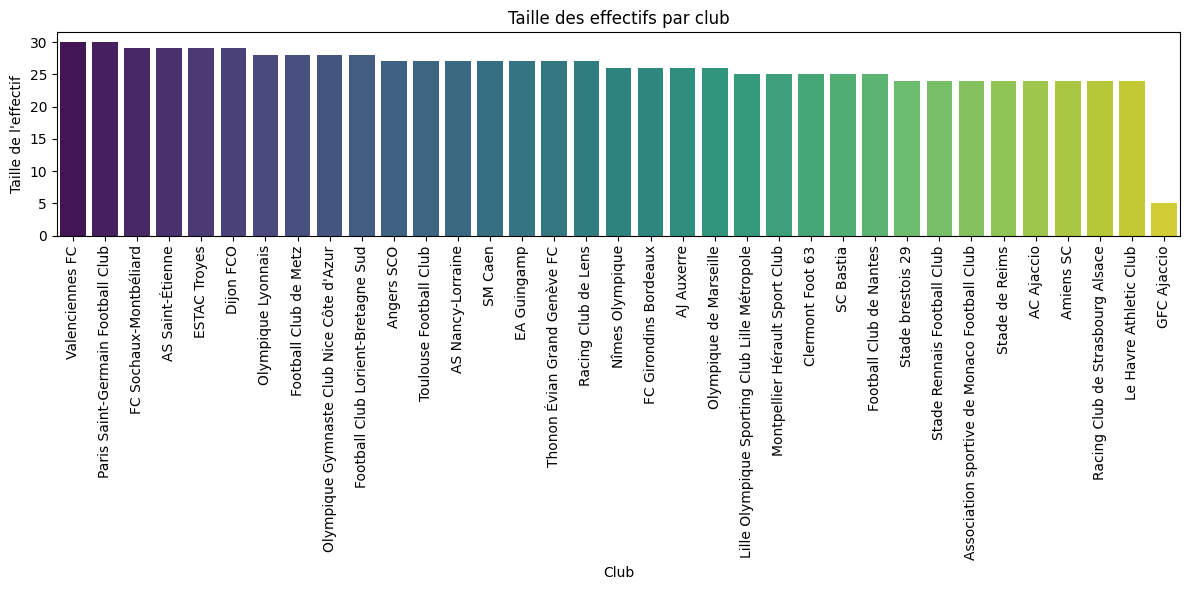

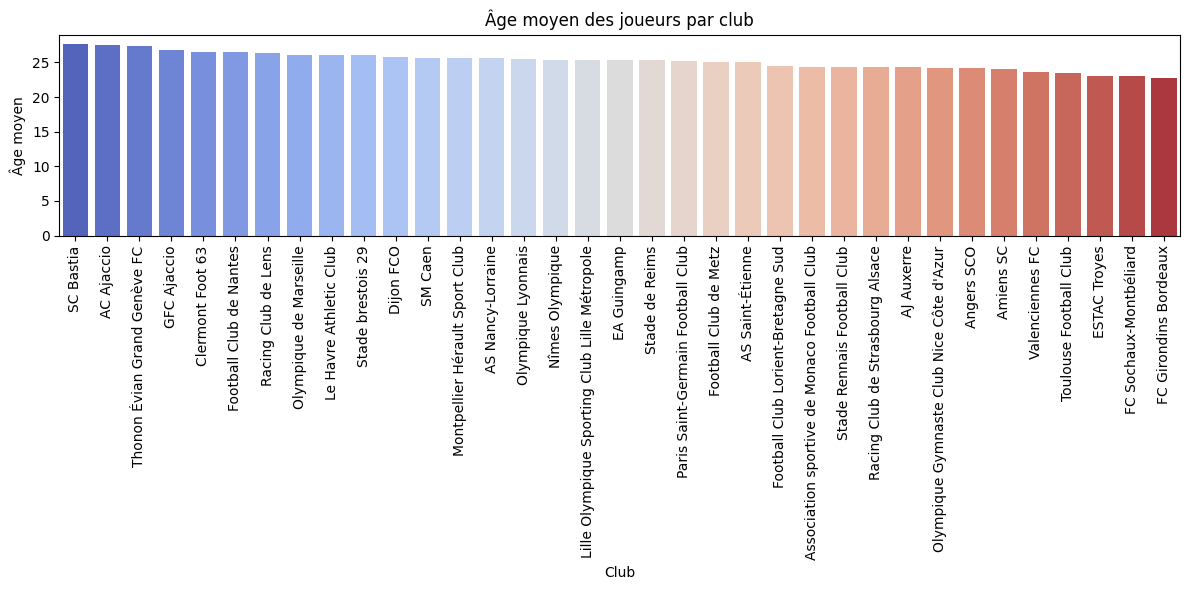

In [ ]:
# 2. ANALYSE DES EFFECTIFS
print("\n" + "="*80)
print("2. ANALYSE DES EFFECTIFS")
print("="*80)

# Statistiques sur les effectifs
print("\nStatistiques sur les effectifs des clubs:")
print("Taille moyenne des effectifs:", df_clubs['squad_size'].mean())
print("Âge moyen des joueurs:", df_clubs['average_age'].mean())
print("Nombre moyen de joueurs étrangers:", df_clubs['foreigners_number'].mean())
print("Pourcentage moyen de joueurs étrangers:", (df_clubs['foreigners_number'] / df_clubs['squad_size'] * 100).mean())

# Visualisation de la taille des effectifs
plt.figure(figsize=(12, 6))
df_clubs = df_clubs.sort_values('squad_size', ascending=False)
sns.barplot(x='name', y='squad_size', data=df_clubs, palette='viridis')
plt.title('Taille des effectifs par club')
plt.xlabel('Club')
plt.ylabel('Taille de l\'effectif')
plt.xticks(rotation=90)
plt.tight_layout()

# Visualisation de l'âge moyen
plt.figure(figsize=(12, 6))
df_clubs = df_clubs.sort_values('average_age', ascending=False)
sns.barplot(x='name', y='average_age', data=df_clubs, palette='coolwarm')
plt.title('Âge moyen des joueurs par club')
plt.xlabel('Club')
plt.ylabel('Âge moyen')
plt.xticks(rotation=90)
plt.tight_layout()



3. ANALYSE DES JOUEURS ÉTRANGERS


<ipython-input-23-101bfdcd3297>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='foreigners_number', data=df_clubs, palette='magma')
<ipython-input-23-101bfdcd3297>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='foreigners_percentage', data=df_clubs, palette='plasma')


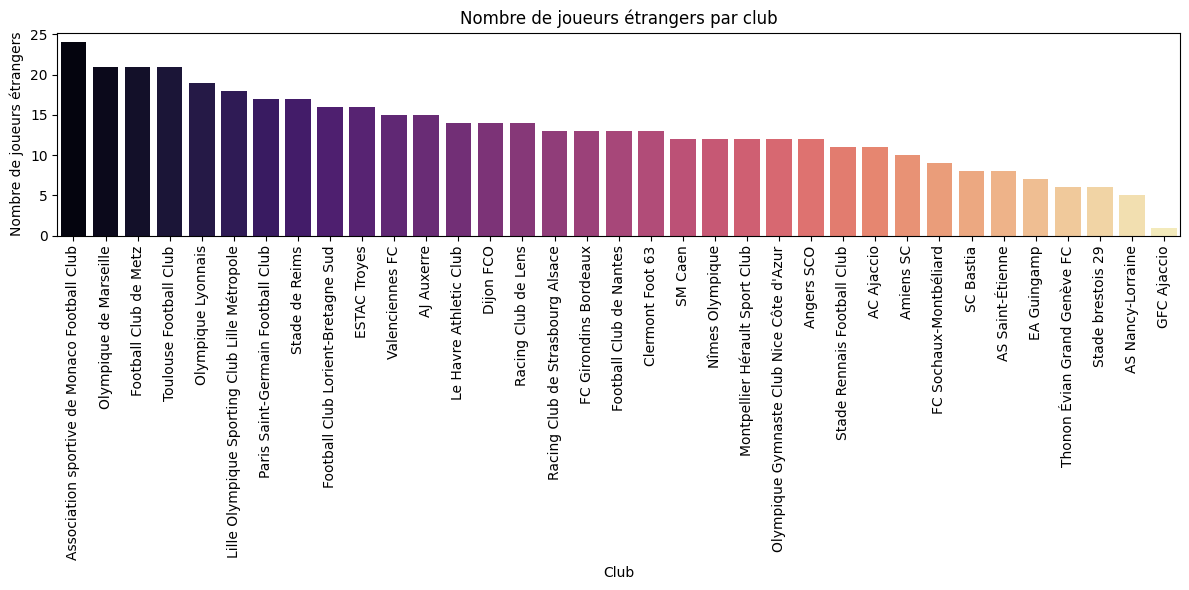

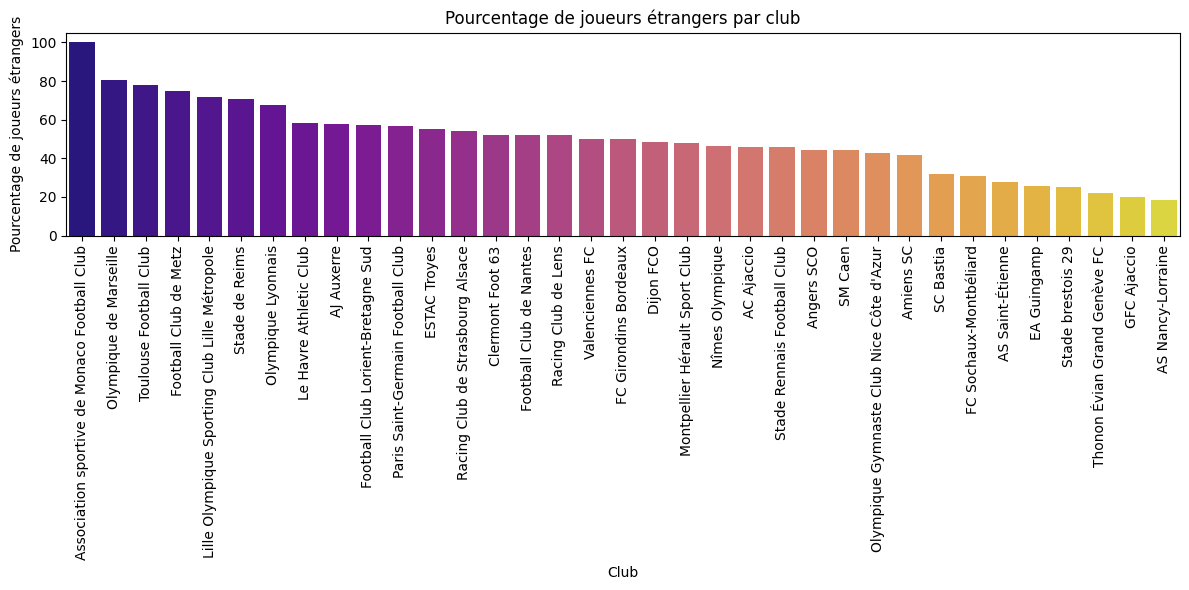

In [ ]:
# 3. ANALYSE DES JOUEURS ÉTRANGERS
print("\n" + "="*80)
print("3. ANALYSE DES JOUEURS ÉTRANGERS")
print("="*80)

# Nombre de joueurs étrangers
plt.figure(figsize=(12, 6))
df_clubs = df_clubs.sort_values('foreigners_number', ascending=False)
sns.barplot(x='name', y='foreigners_number', data=df_clubs, palette='magma')
plt.title('Nombre de joueurs étrangers par club')
plt.xlabel('Club')
plt.ylabel('Nombre de joueurs étrangers')
plt.xticks(rotation=90)
plt.tight_layout()

# Pourcentage de joueurs étrangers
df_clubs['foreigners_percentage'] = df_clubs['foreigners_number'] / df_clubs['squad_size'] * 100
plt.figure(figsize=(12, 6))
df_clubs = df_clubs.sort_values('foreigners_percentage', ascending=False)
sns.barplot(x='name', y='foreigners_percentage', data=df_clubs, palette='plasma')
plt.title('Pourcentage de joueurs étrangers par club')
plt.xlabel('Club')
plt.ylabel('Pourcentage de joueurs étrangers')
plt.xticks(rotation=90)
plt.tight_layout()


4. ANALYSE DES INFRASTRUCTURES

Statistiques sur les stades:
Capacité moyenne des stades: 26239.314285714285
Capacité médiane des stades: 21684.0
Plus grande capacité: 67394
Plus petite capacité: 2500


<ipython-input-24-12eac6929a64>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='name', y='stadium_seats', data=df_clubs, palette='inferno')


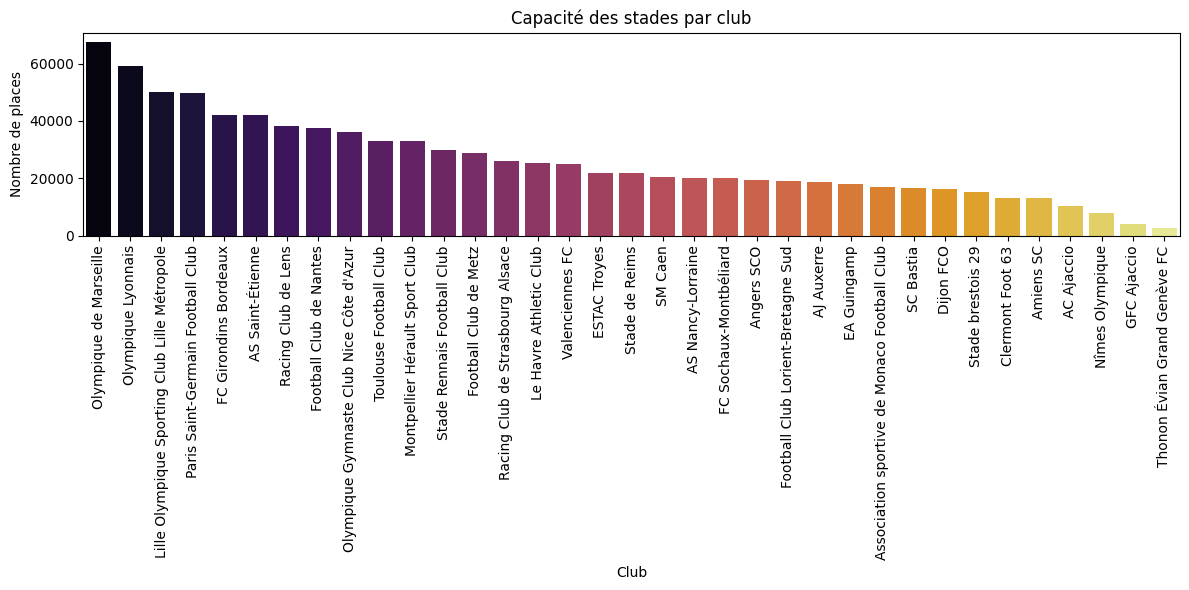

In [ ]:
# 4. ANALYSE DES INFRASTRUCTURES
print("\n" + "="*80)
print("4. ANALYSE DES INFRASTRUCTURES")
print("="*80)

# Capacité des stades
print("\nStatistiques sur les stades:")
print("Capacité moyenne des stades:", df_clubs['stadium_seats'].mean())
print("Capacité médiane des stades:", df_clubs['stadium_seats'].median())
print("Plus grande capacité:", df_clubs['stadium_seats'].max())
print("Plus petite capacité:", df_clubs['stadium_seats'].min())

plt.figure(figsize=(12, 6))
df_clubs = df_clubs.sort_values('stadium_seats', ascending=False)
sns.barplot(x='name', y='stadium_seats', data=df_clubs, palette='inferno')
plt.title('Capacité des stades par club')
plt.xlabel('Club')
plt.ylabel('Nombre de places')
plt.xticks(rotation=90)
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()



5. RELATIONS ENTRE VARIABLES


<Axes: >

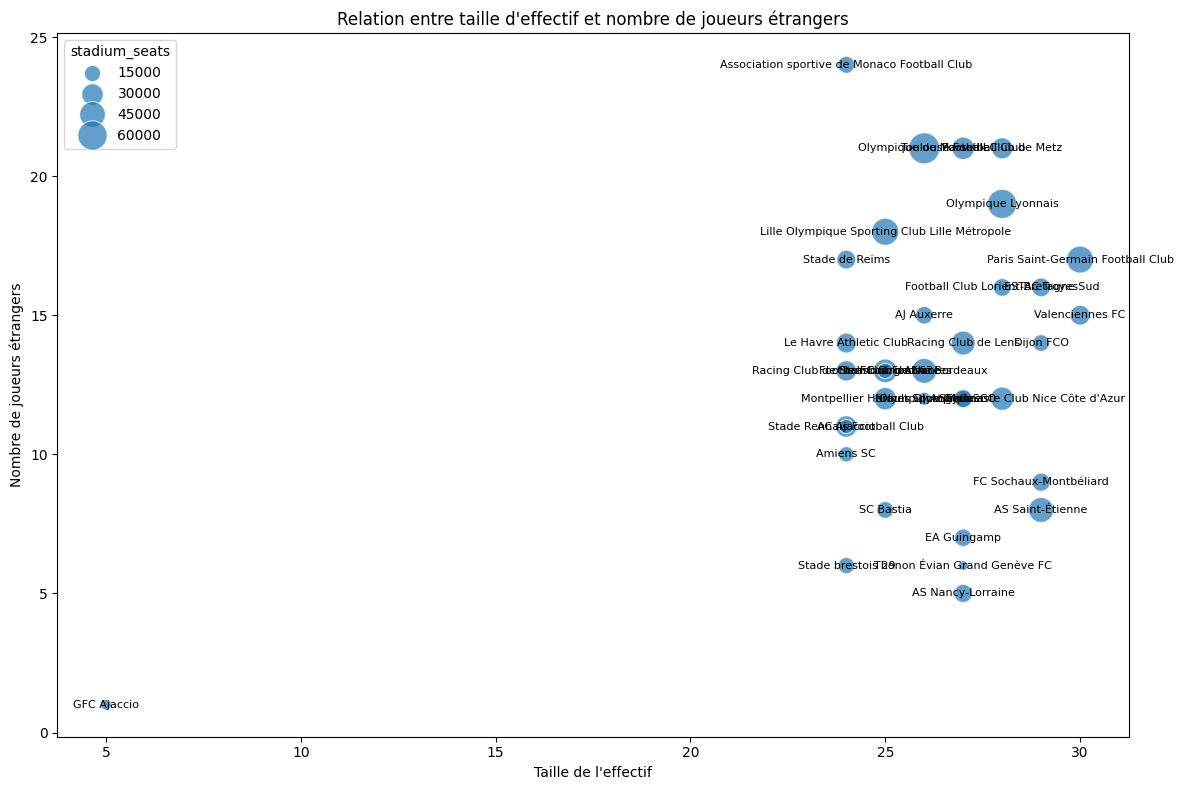

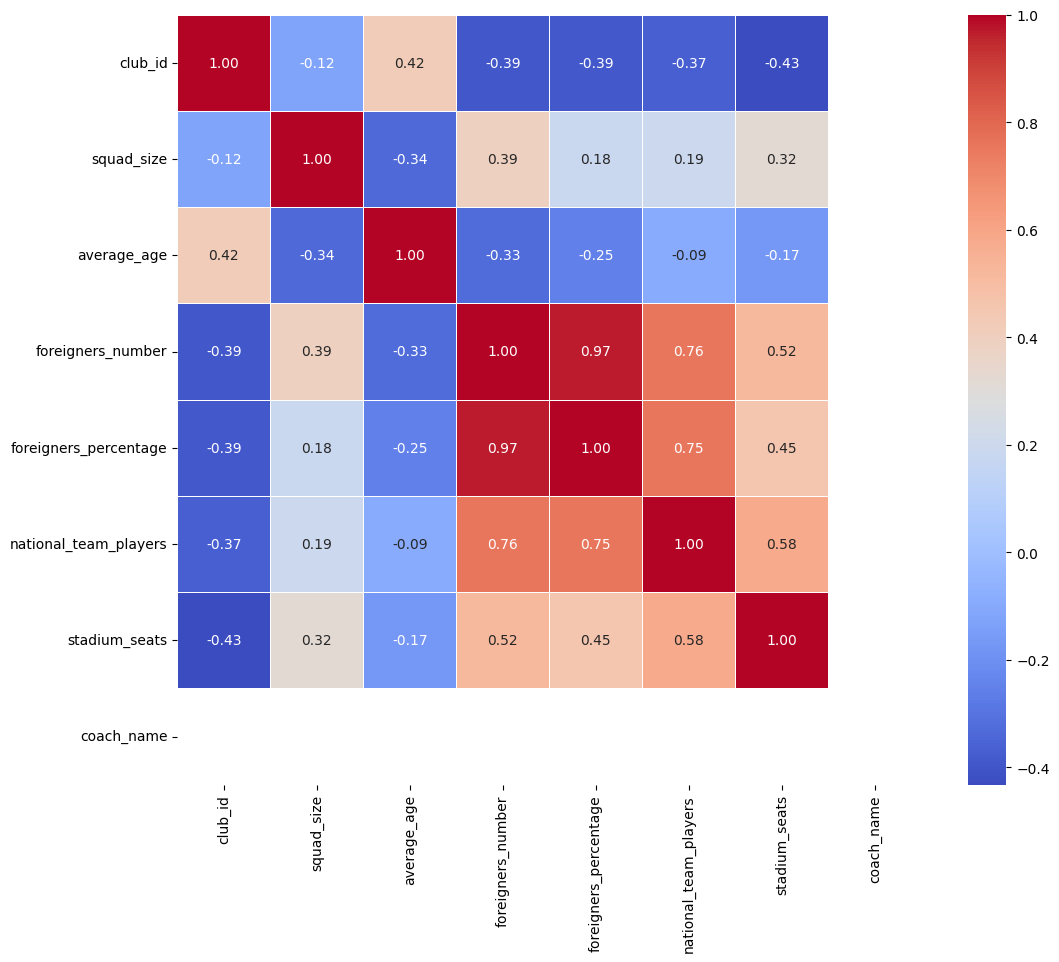

In [ ]:
# 5. RELATIONS ENTRE VARIABLES
print("\n" + "="*80)
print("5. RELATIONS ENTRE VARIABLES")
print("="*80)

# Relation entre la taille de l'effectif et le nombre de joueurs étrangers
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clubs, x='squad_size', y='foreigners_number',
                size='stadium_seats', sizes=(50, 500), alpha=0.7)
plt.title('Relation entre taille d\'effectif et nombre de joueurs étrangers')
plt.xlabel('Taille de l\'effectif')
plt.ylabel('Nombre de joueurs étrangers')
for i, row in df_clubs.iterrows():
    plt.text(row['squad_size'], row['foreigners_number'], row['name'],
             fontsize=8, ha='center', va='center')
plt.tight_layout()

# Matrice de corrélation
numeric_columns = df_clubs.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_clubs[numeric_columns].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# **I.4. Analyse Exploratoire de `player_valuation_before_season.csv`**

In [5]:
# 1. APERÇU DE BASE DU DATASET
df_valuations.info()
print("\n1. APERÇU DES DONNÉES\n")
print("Dimensions:", df_valuations.shape)
print("\nPremières lignes:")
print(df_valuations.head())
print("\nTypes de données:")
print(df_valuations.dtypes)
print("\nStatistiques descriptives:")
print(df_valuations.describe())
print("\nValeurs manquantes:")
print(df_valuations.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30215 entries, 0 to 30214
Data columns (total 5 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   player_id                            30215 non-null  int64 
 1   date                                 30215 non-null  object
 2   market_value_in_eur                  30215 non-null  int64 
 3   current_club_id                      30215 non-null  int64 
 4   player_club_domestic_competition_id  30215 non-null  object
dtypes: int64(3), object(2)
memory usage: 1.2+ MB

1. APERÇU DES DONNÉES

Dimensions: (30215, 5)

Premières lignes:
   player_id        date  market_value_in_eur  current_club_id  \
0        773  2004-10-04              3500000            14171   
1       1327  2004-10-04              4000000             1159   
2       1423  2004-10-04              1000000              855   
3       1572  2004-10-04              1000000            

In [36]:
df_valuations.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,773,2004-10-04,3500000,14171,FR1
1,1327,2004-10-04,4000000,1159,FR1
2,1423,2004-10-04,1000000,855,FR1
3,1572,2004-10-04,1000000,162,FR1
4,1613,2004-10-04,200000,855,FR1


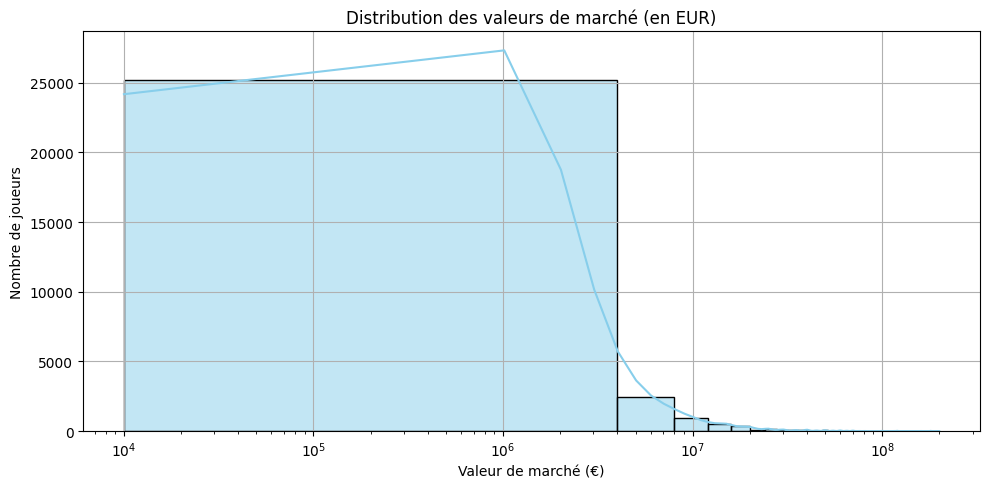

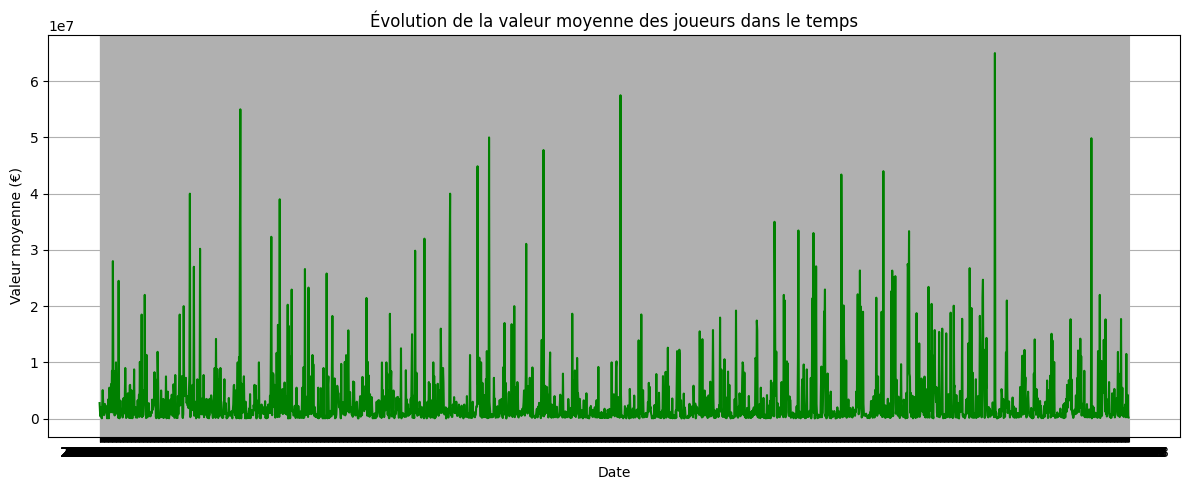

🔝 Joueurs avec les plus fortes valeurs de marché à la date la plus récente :
       player_id  market_value_in_eur  current_club_id
30214     696598               300000              417
30212     363717               150000             1162
30213     396131               150000             1421


In [35]:
# Distribution des valeurs de marché
plt.figure(figsize=(10, 5))
sns.histplot(df_valuations['market_value_in_eur'], bins=50, kde=True, color='skyblue')
plt.title("Distribution des valeurs de marché (en EUR)")
plt.xlabel("Valeur de marché (€)")
plt.ylabel("Nombre de joueurs")
plt.xscale("log")  # car les valeurs varient beaucoup
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# Évolution de la valeur moyenne des joueurs dans le temps
df_avg_per_date = df_valuations.groupby('date')['market_value_in_eur'].mean().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(data=df_avg_per_date, x='date', y='market_value_in_eur', color='green')
plt.title("Évolution de la valeur moyenne des joueurs dans le temps")
plt.xlabel("Date")
plt.ylabel("Valeur moyenne (€)")
plt.grid(True)
plt.tight_layout()
plt.show()

# ------------------------------
# Joueurs avec les valeurs les plus élevées (dernière date)
latest_date = df_valuations['date'].max()
df_latest = df_valuations[df_valuations['date'] == latest_date]
top_players = df_latest.sort_values(by='market_value_in_eur', ascending=False).head(10)

print("🔝 Joueurs avec les plus fortes valeurs de marché à la date la plus récente :")
print(top_players[['player_id', 'market_value_in_eur', 'current_club_id']])

# **I.5. Analyse Exploratoire de `player_appearance.csv`**

In [6]:

print("="*80)
print("EXPLORATION DES APPARITIONS DES JOUEURS")
print("="*80)

# 1. APERÇU DE BASE DU DATASET
print("\n1. APERÇU DES DONNÉES\n")
print("Dimensions:", df_appearance.shape)
print("\nPremières lignes:")
print(df_appearance.head())
print("\nTypes de données:")
print(df_appearance.dtypes)
print("\nStatistiques descriptives:")
print(df_appearance.describe())
print("\nValeurs manquantes:")
print(df_appearance.isnull().sum())

# Convertir les dates en format datetime si nécessaire
if 'match_date' in df_appearance.columns and df_appearance['match_date'].dtype == object:
    df_appearance['match_date'] = pd.to_datetime(df_appearance['match_date'])

EXPLORATION DES APPARITIONS DES JOUEURS

1. APERÇU DES DONNÉES

Dimensions: (115182, 13)

Premières lignes:
    appearance_id  game_id  player_id  player_club_id  player_current_club_id  \
0  2229837_108830  2229837     108830             415                    3205   
1  2229837_113707  2229837     113707             969                    1082   
2  2229837_126767  2229837     126767             415                    3205   
3  2229837_126796  2229837     126796             415                   60949   
4  2229837_127032  2229837     127032             415                     141   

         date      player_name competition_id  yellow_cards  red_cards  goals  \
0  2012-08-10  Aymen Abdennour            FR1             1          0      0   
1  2012-08-10     Rémy Cabella            FR1             1          0      0   
2  2012-08-10      Ali Ahamada            FR1             0          0      0   
3  2012-08-10  Adrien Regattin            FR1             0          1      0   



2. ANALYSE DES APPARITIONS


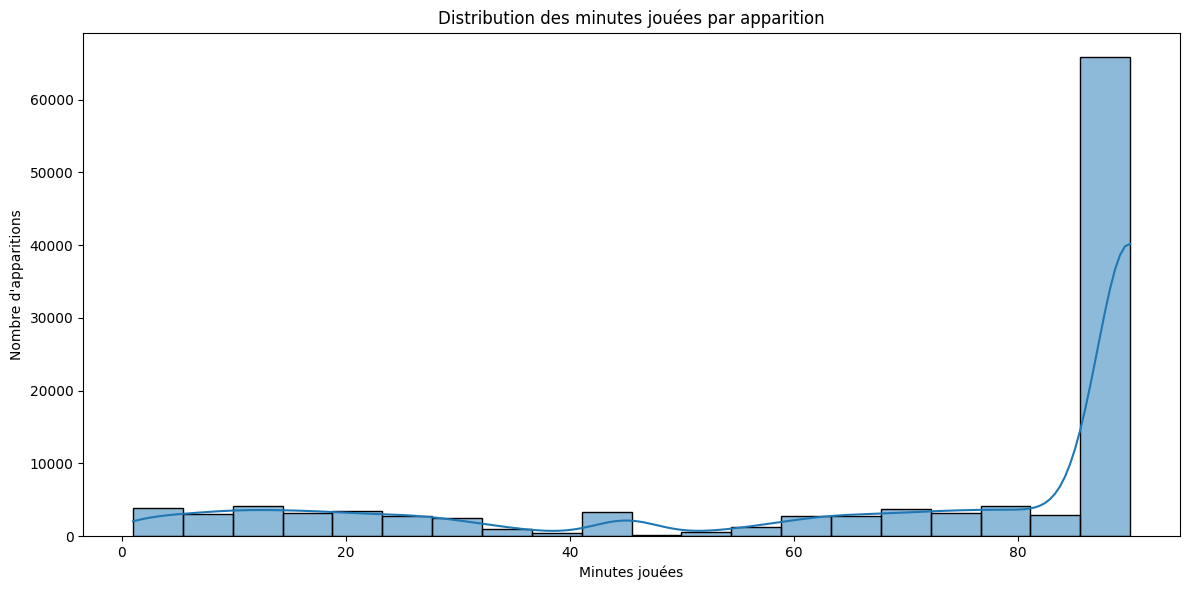

In [7]:
# 2. ANALYSE DES APPARITIONS
print("\n" + "="*80)
print("2. ANALYSE DES APPARITIONS")
print("="*80)

# Nombre d'apparitions par saison
if 'season' in df_appearance.columns:
    season_counts = df_appearance['season'].value_counts().sort_index()
    print("\nNombre d'apparitions par saison:")
    print(season_counts)

    plt.figure(figsize=(12, 6))
    season_counts.plot(kind='bar', color='skyblue')
    plt.title('Nombre d\'apparitions de joueurs par saison')
    plt.xlabel('Saison')
    plt.ylabel('Nombre d\'apparitions')
    plt.xticks(rotation=45)
    plt.tight_layout()

# Distribution des minutes jouées
plt.figure(figsize=(12, 6))
sns.histplot(df_appearance['minutes_played'], bins=20, kde=True)
plt.title('Distribution des minutes jouées par apparition')
plt.xlabel('Minutes jouées')
plt.ylabel('Nombre d\'apparitions')
plt.tight_layout()


4. ANALYSE PAR JOUEUR
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115182 entries, 0 to 115181
Data columns (total 13 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   appearance_id           115182 non-null  object
 1   game_id                 115182 non-null  int64 
 2   player_id               115182 non-null  int64 
 3   player_club_id          115182 non-null  int64 
 4   player_current_club_id  115182 non-null  int64 
 5   date                    115182 non-null  object
 6   player_name             115182 non-null  object
 7   competition_id          115182 non-null  object
 8   yellow_cards            115182 non-null  int64 
 9   red_cards               115182 non-null  int64 
 10  goals                   115182 non-null  int64 
 11  assists                 115182 non-null  int64 
 12  minutes_played          115182 non-null  int64 
dtypes: int64(9), object(4)
memory usage: 11.4+ MB

Joueurs avec le plu

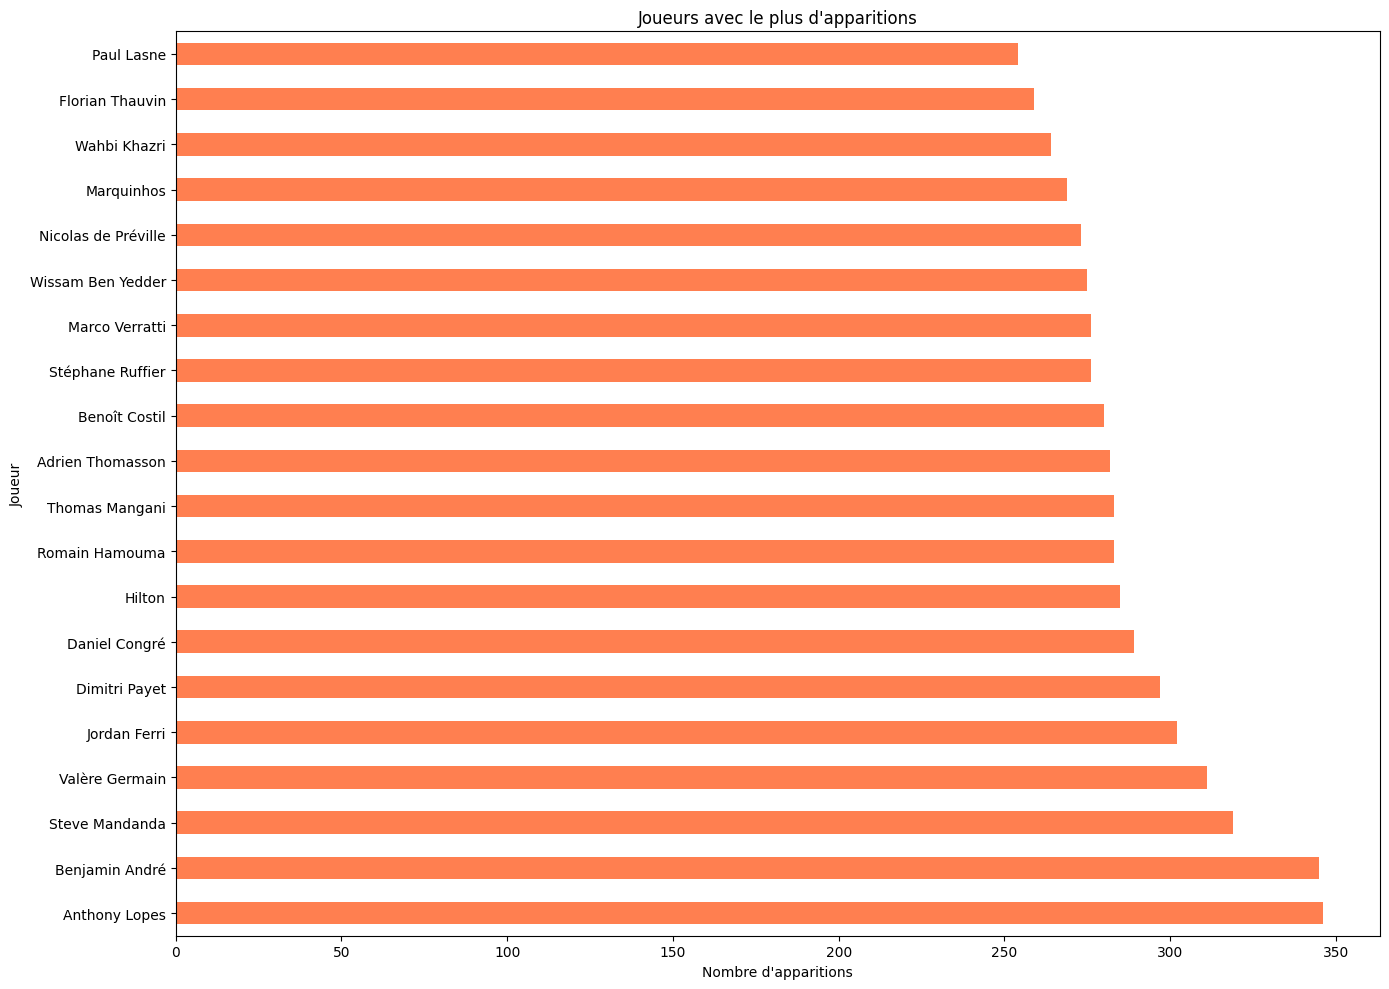

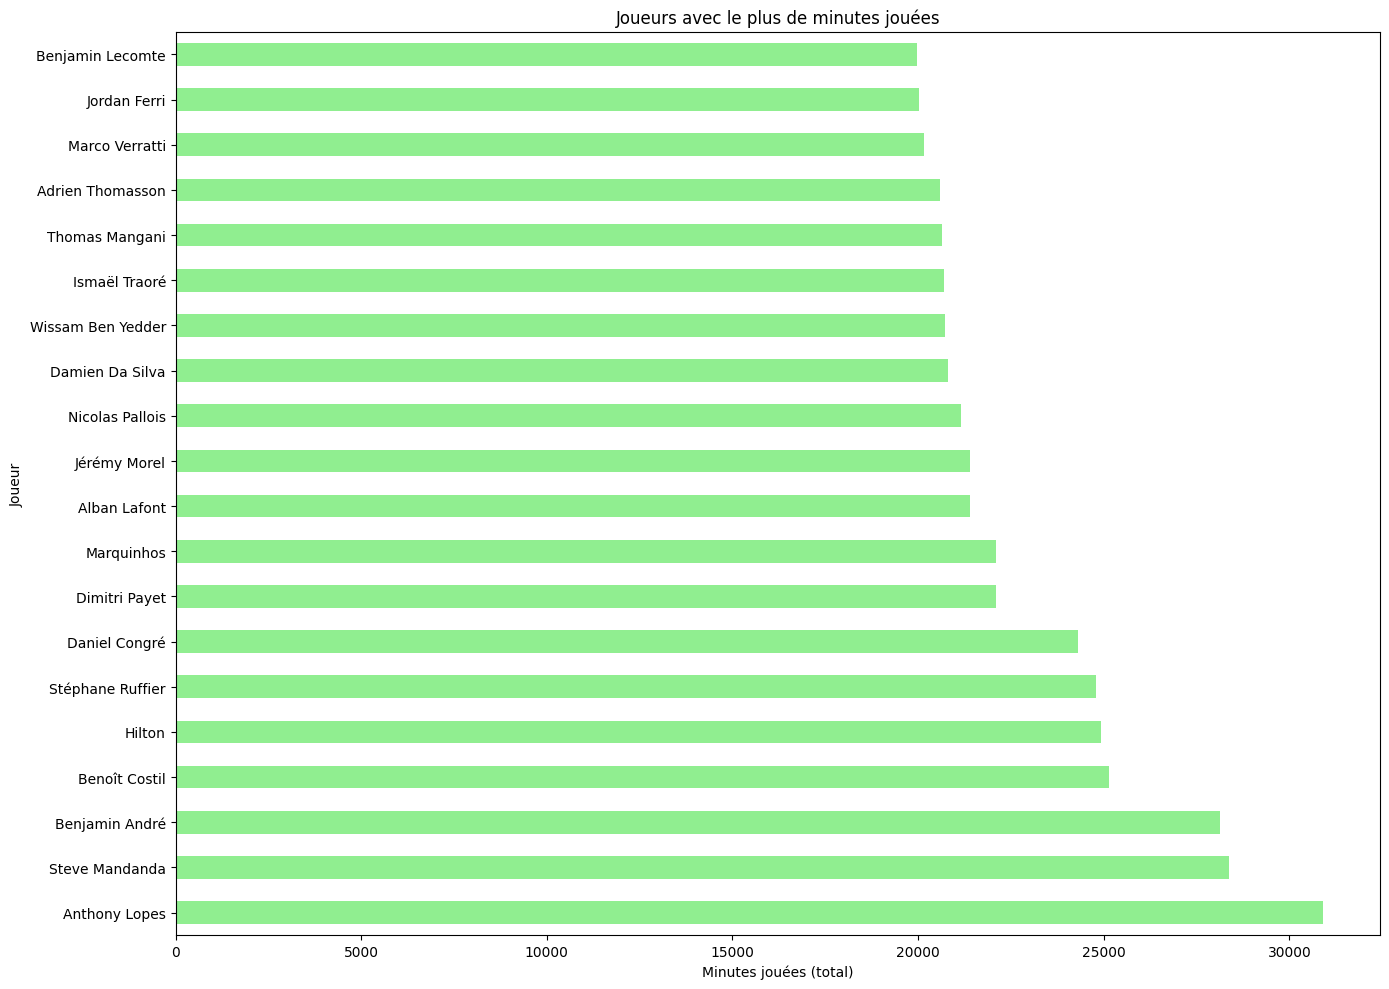

In [4]:
# 4. ANALYSE PAR JOUEUR
print("\n" + "="*80)
print("4. ANALYSE PAR JOUEUR")
print("="*80)
df_appearance.info()
if 'player_name' in df_appearance.columns:
    # Joueurs avec le plus d'apparitions
    player_counts = df_appearance['player_name'].value_counts().head(20)
    print("\nJoueurs avec le plus d'apparitions:")
    print(player_counts)

    plt.figure(figsize=(14, 10))
    player_counts.plot(kind='barh', color='coral')
    plt.title('Joueurs avec le plus d\'apparitions')
    plt.xlabel('Nombre d\'apparitions')
    plt.ylabel('Joueur')
    plt.tight_layout()
    plt.savefig('top_players_appearances.png')

    # Joueurs avec le plus de minutes jouées
    player_minutes = df_appearance.groupby('player_name')['minutes_played'].sum().sort_values(ascending=False).head(20)
    print("\nJoueurs avec le plus de minutes jouées:")
    print(player_minutes)

    plt.figure(figsize=(14, 10))
    player_minutes.plot(kind='barh', color='lightgreen')
    plt.title('Joueurs avec le plus de minutes jouées')
    plt.xlabel('Minutes jouées (total)')
    plt.ylabel('Joueur')
    plt.tight_layout()
    plt.savefig('top_players_minutes.png')


6. ANALYSE DES PERFORMANCES

Distribution des buts marqués par apparition:
goals
0    105876
1      8392
2       826
3        80
4         7
5         1
Name: count, dtype: int64

Top buteurs:
player_name
Kylian Mbappé          164
Wissam Ben Yedder      144
Edinson Cavani         138
Alexandre Lacazette    121
Zlatan Ibrahimović     113
Florian Thauvin         86
Andy Delort             85
Neymar                  82
Dimitri Payet           73
Wahbi Khazri            73
Gaëtan Laborde          72
Radamel Falcao          65
Memphis Depay           62
Valère Germain          61
Karl Toko Ekambi        59
Nolan Roux              58
Ángel Di María          57
Moussa Dembélé          56
Jimmy Briand            54
Habib Diallo            53
Name: goals, dtype: int64

Distribution des passes décisives par apparition:
assists
0    107864
1      6871
2       418
3        28
4         1
Name: count, dtype: int64

Top passeurs:
player_name
Dimitri Payet          95
Ángel Di María         76
Kyli

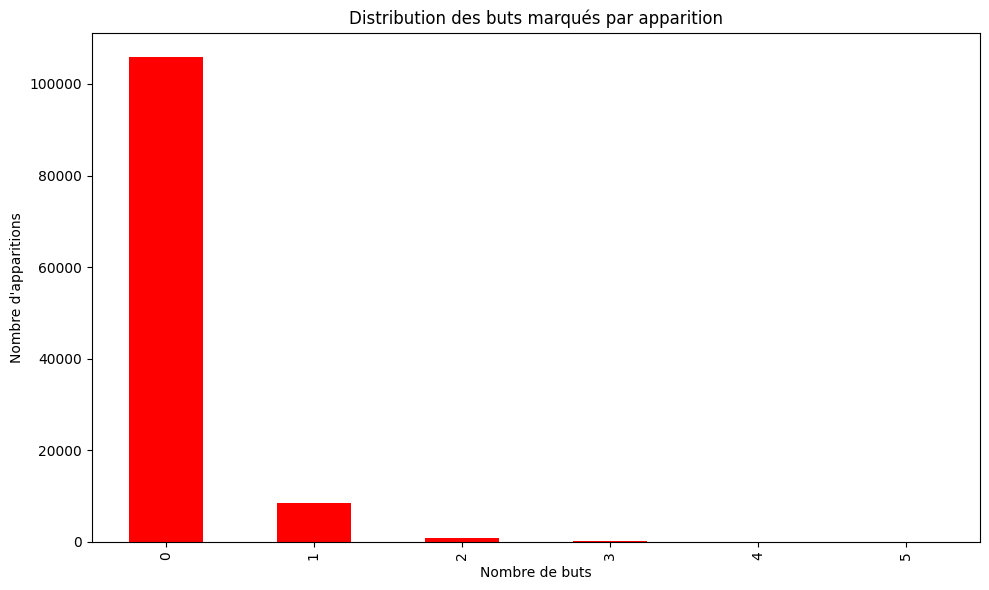

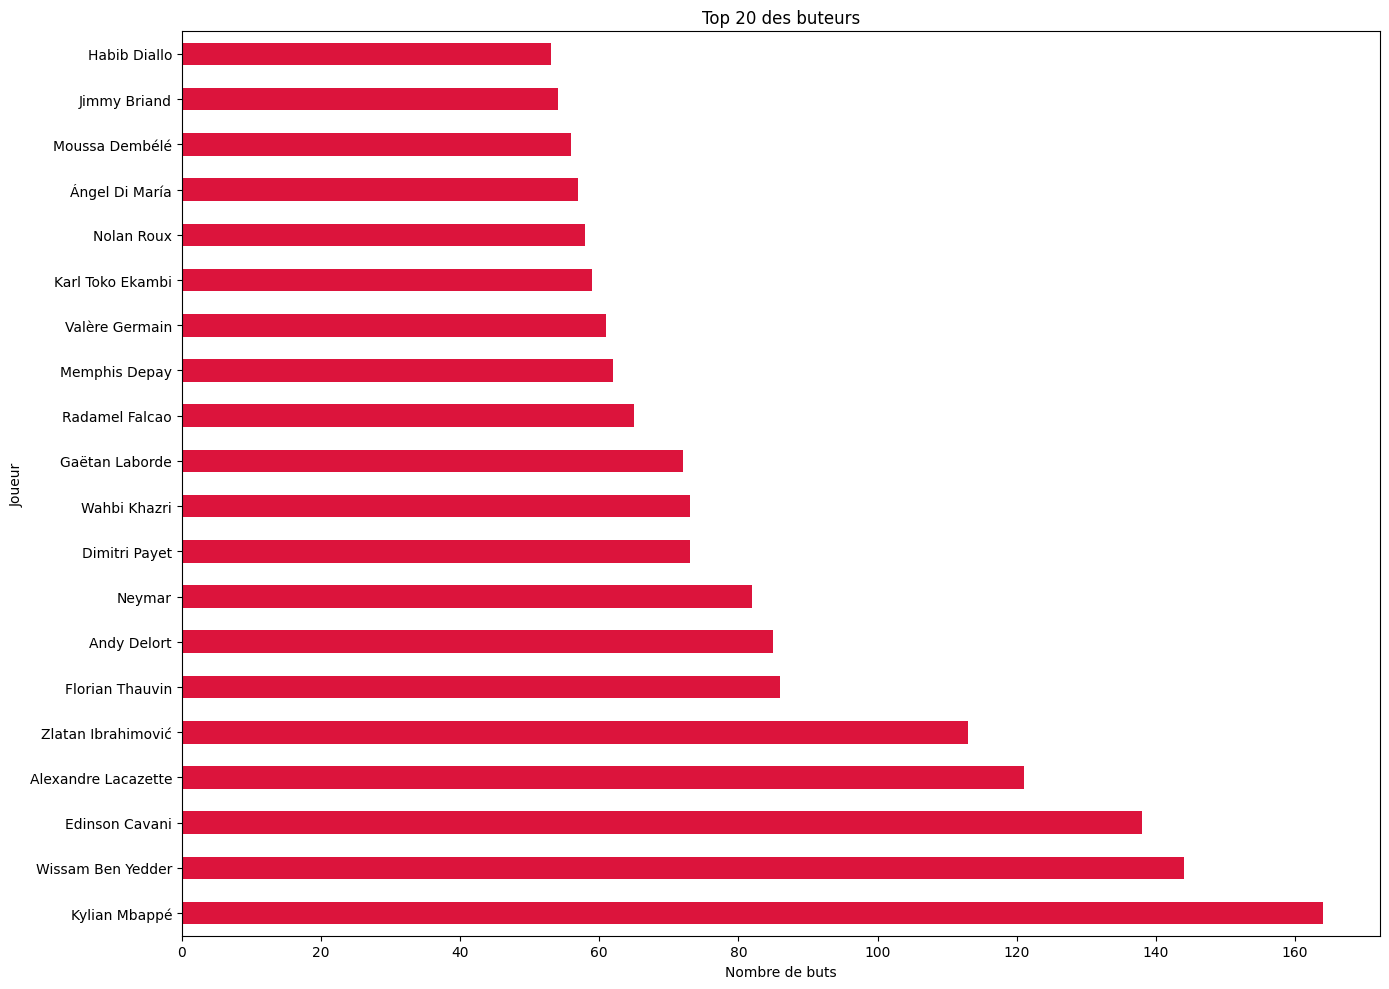

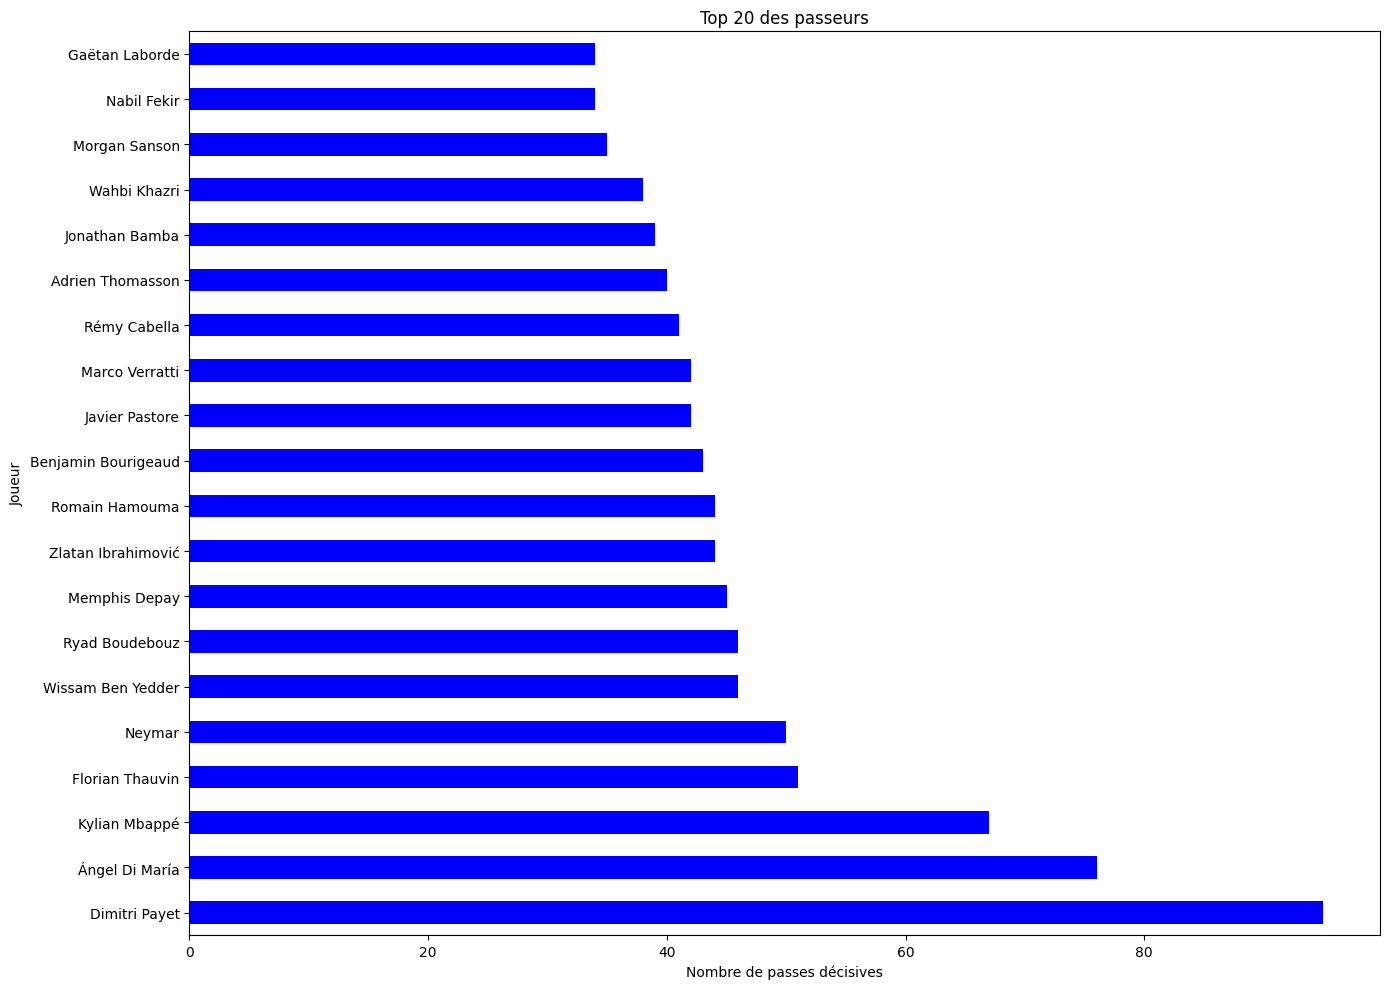

In [12]:

# 6. ANALYSE DES PERFORMANCES
print("\n" + "="*80)
print("6. ANALYSE DES PERFORMANCES")
print("="*80)

if 'goals' in df_appearance.columns:
    # Distribution des buts
    goals_distribution = df_appearance['goals'].value_counts().sort_index()
    print("\nDistribution des buts marqués par apparition:")
    print(goals_distribution)

    plt.figure(figsize=(10, 6))
    goals_distribution.plot(kind='bar', color='red')
    plt.title('Distribution des buts marqués par apparition')
    plt.xlabel('Nombre de buts')
    plt.ylabel('Nombre d\'apparitions')
    plt.tight_layout()

    # Top buteurs
    players_goals = df_appearance.groupby('player_name')['goals'].sum().sort_values(ascending=False).head(20)
    print("\nTop buteurs:")
    print(players_goals)

    plt.figure(figsize=(14, 10))
    players_goals.plot(kind='barh', color='crimson')
    plt.title('Top 20 des buteurs')
    plt.xlabel('Nombre de buts')
    plt.ylabel('Joueur')
    plt.tight_layout()

if 'assists' in df_appearance.columns:
    # Distribution des passes décisives
    assists_distribution = df_appearance['assists'].value_counts().sort_index()
    print("\nDistribution des passes décisives par apparition:")
    print(assists_distribution)

    # Top passeurs
    players_assists = df_appearance.groupby('player_name')['assists'].sum().sort_values(ascending=False).head(20)
    print("\nTop passeurs:")
    print(players_assists)

    plt.figure(figsize=(14, 10))
    players_assists.plot(kind='barh', color='blue')
    plt.title('Top 20 des passeurs')
    plt.xlabel('Nombre de passes décisives')
    plt.ylabel('Joueur')
    plt.tight_layout()


# **I.6:. Analyse Exploratoire de `game_lineups.csv` `&` `game_events.csv`**

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Chemin des données
# base_path = ""  # À définir selon l'emplacement des fichiers

# -------------------------------------------------------------------------------
# PARTIE 1: EXPLORATION DES DONNÉES
# -------------------------------------------------------------------------------

print("="*80)
print("PARTIE 1: EXPLORATION DES DONNÉES")
print("="*80)

# -------------------------------------------------------------------------------
# 1.1 EXPLORATION DES DONNÉES DE COMPOSITION (df_lineups)
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("1.1 EXPLORATION DES DONNÉES DE COMPOSITION (df_lineups)")
print("="*80)

# Aperçu de la structure de df_lineups
print("\nInformations sur df_lineups:")
print(df_lineups.info())

# Aperçu des premières lignes
print("\nAperçu des premières lignes de df_lineups:")
print(df_lineups.head())

# Statistiques descriptives
print("\nStatistiques descriptives de df_lineups:")
print(df_lineups.describe(include='all'))

# Distribution des valeurs dans les colonnes catégorielles
print("\nDistribution des joueurs par type (titulaire/remplaçant):")
print(df_lineups['type'].value_counts())

print("\nDistribution des joueurs par position:")
print(df_lineups['position'].value_counts())

print("\nNombre de capitaines:")
print(df_lineups['team_captain'].value_counts())

# Nombre de matchs uniques
print("\nNombre de matchs uniques:", df_lineups['game_id'].nunique())

# Nombre d'équipes uniques
print("\nNombre d'équipes uniques:", df_lineups['club_id'].nunique())

# Nombre de joueurs uniques
print("\nNombre de joueurs uniques:", df_lineups['player_id'].nunique())


PARTIE 1: EXPLORATION DES DONNÉES

1.1 EXPLORATION DES DONNÉES DE COMPOSITION (df_lineups)

Informations sur df_lineups:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137132 entries, 0 to 137131
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Unnamed: 0       137132 non-null  int64 
 1   game_lineups_id  137132 non-null  object
 2   date             137132 non-null  object
 3   game_id          137132 non-null  int64 
 4   player_id        137132 non-null  int64 
 5   club_id          137132 non-null  int64 
 6   player_name      137132 non-null  object
 7   type             137132 non-null  object
 8   position         137132 non-null  object
 9   number           137132 non-null  object
 10  team_captain     137132 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 11.5+ MB
None

Aperçu des premières lignes de df_lineups:
   Unnamed: 0                   game_lineups_id        date  game_id  

In [10]:
# -------------------------------------------------------------------------------
# 1.2 EXPLORATION DES DONNÉES D'ÉVÉNEMENTS (df_events)
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("1.2 EXPLORATION DES DONNÉES D'ÉVÉNEMENTS (df_events)")
print("="*80)

# Aperçu de la structure de df_events
print("\nInformations sur df_events:")
print(df_events.info())

# Aperçu des premières lignes
print("\nAperçu des premières lignes de df_events:")
print(df_events.head())

# Statistiques descriptives
print("\nStatistiques descriptives de df_events:")
print(df_events.describe(include='all'))

# Distribution des types d'événements
print("\nDistribution des types d'événements:")
print(df_events['type'].value_counts())

# Analyse des minutes où se produisent les événements
print("\nStatistiques sur les minutes des événements:")
print(df_events['minute'].describe())

# Valeurs manquantes
print("\nValeurs manquantes dans df_events:")
print(df_events.isnull().sum())

# Analyse des descriptions disponibles
print("\nNombre d'événements avec description:", df_events['description'].notna().sum())
print("\nExemples de descriptions:")
print(df_events['description'].dropna().sample(10))

# Analyse des remplacements
print("\nNombre de remplacements:", df_events['player_in_id'].notna().sum())

# Analyse des passes décisives
print("\nNombre de passes décisives:", df_events['player_assist_id'].notna().sum())


1.2 EXPLORATION DES DONNÉES D'ÉVÉNEMENTS (df_events)

Informations sur df_events:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40995 entries, 0 to 40994
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        40995 non-null  int64  
 1   game_event_id     40995 non-null  object 
 2   date              40995 non-null  object 
 3   game_id           40995 non-null  int64  
 4   minute            40995 non-null  int64  
 5   type              40995 non-null  object 
 6   club_id           40995 non-null  int64  
 7   player_id         40995 non-null  int64  
 8   description       19667 non-null  object 
 9   player_in_id      26092 non-null  float64
 10  player_assist_id  2268 non-null   float64
dtypes: float64(2), int64(5), object(4)
memory usage: 3.4+ MB
None

Aperçu des premières lignes de df_events:
   Unnamed: 0                     game_event_id        date  game_id  minute  \
0      

In [11]:
# -------------------------------------------------------------------------------
# 1.3 ANALYSE CROISÉE DES DATASETS
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("1.3 ANALYSE CROISÉE DES DATASETS")
print("="*80)

# Matchs communs aux deux datasets
common_games = set(df_lineups['game_id']).intersection(set(df_events['game_id']))
print("\nNombre de matchs communs aux deux datasets:", len(common_games))

# Joueurs communs aux deux datasets
common_players = set(df_lineups['player_id']).intersection(set(df_events['player_id']))
print("\nNombre de joueurs communs aux deux datasets:", len(common_players))

# Dates communes aux deux datasets
df_lineups['date'] = pd.to_datetime(df_lineups['date'])
df_events['date'] = pd.to_datetime(df_events['date'])

date_range_lineups = (df_lineups['date'].min(), df_lineups['date'].max())
date_range_events = (df_events['date'].min(), df_events['date'].max())

print("\nPériode couverte par df_lineups:", date_range_lineups)
print("Période couverte par df_events:", date_range_events)



1.3 ANALYSE CROISÉE DES DATASETS

Nombre de matchs communs aux deux datasets: 3695

Nombre de joueurs communs aux deux datasets: 1829

Période couverte par df_lineups: (Timestamp('2013-08-09 00:00:00'), Timestamp('2023-06-03 00:00:00'))
Période couverte par df_events: (Timestamp('2012-08-10 00:00:00'), Timestamp('2023-06-03 00:00:00'))



PARTIE 2: VISUALISATION DES DONNÉES

2.1 VISUALISATION DES DONNÉES DE COMPOSITION (df_lineups)


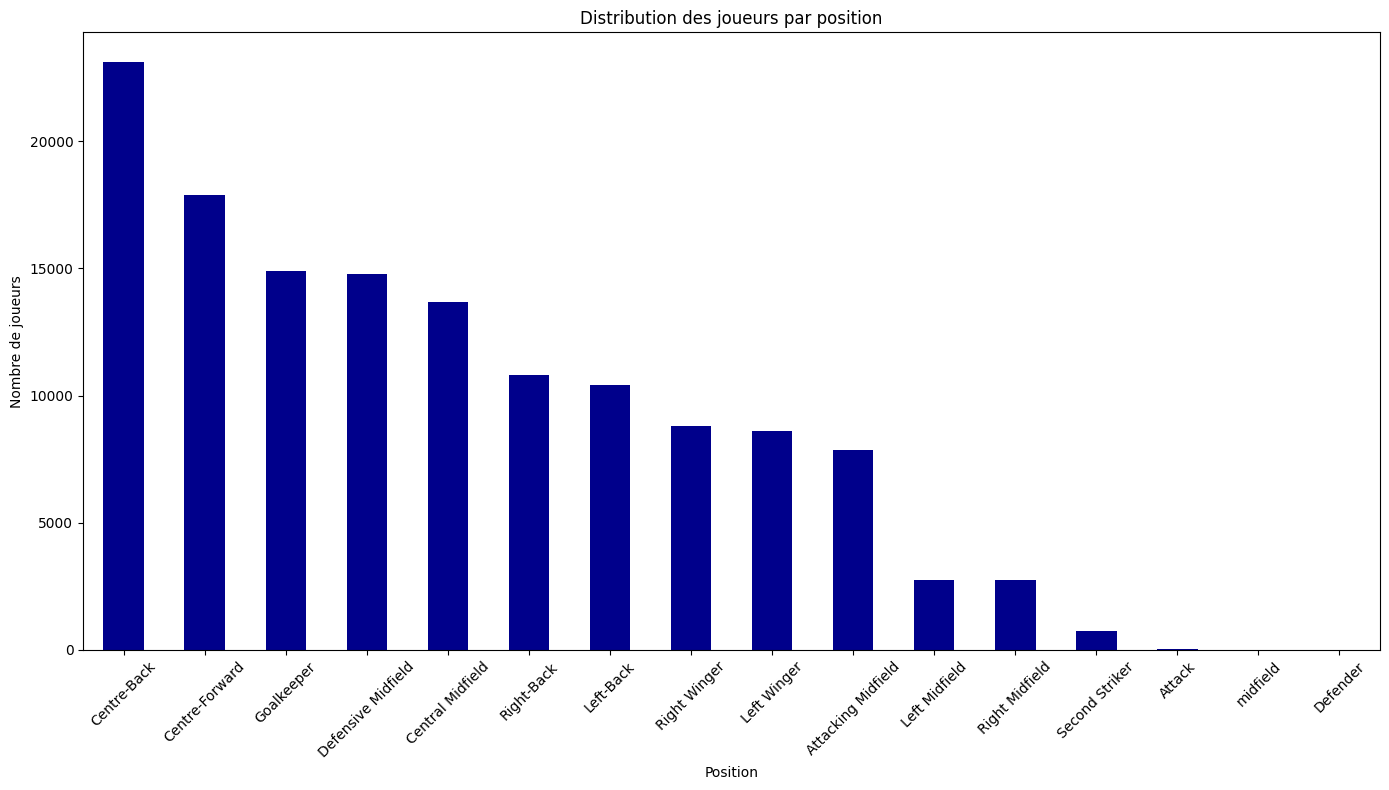

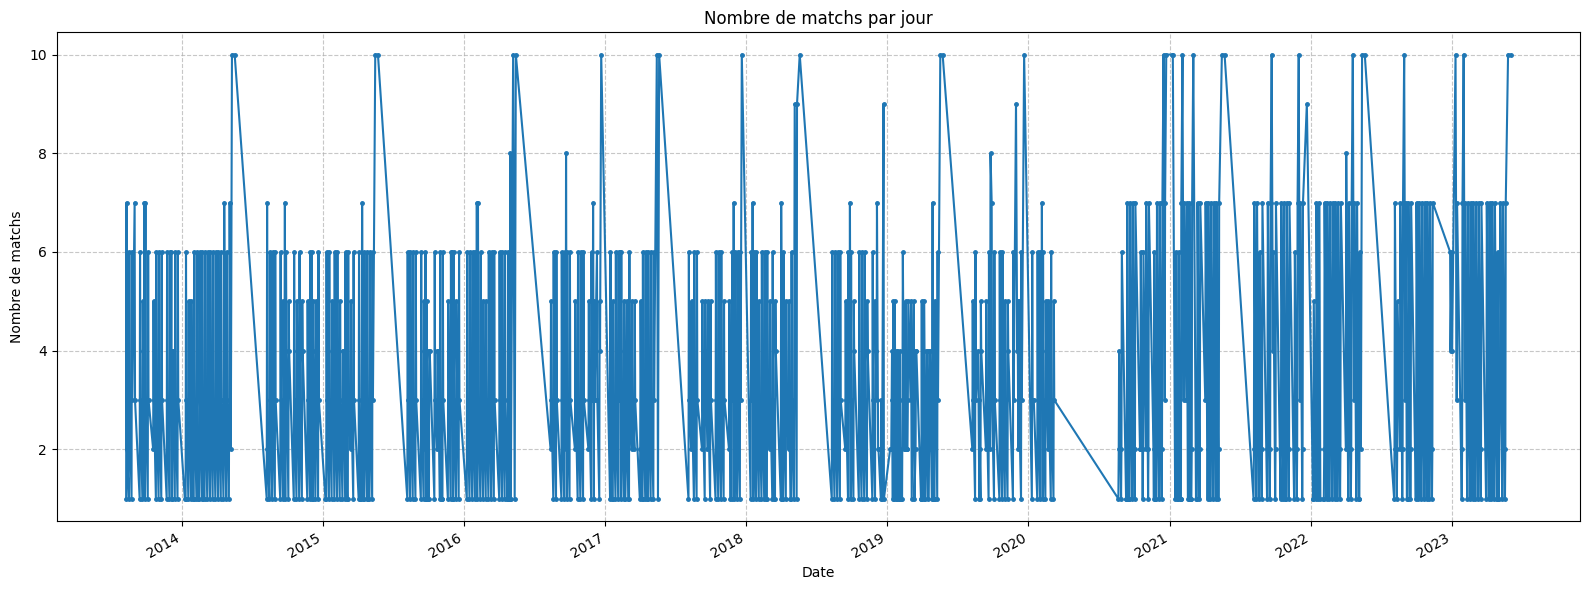

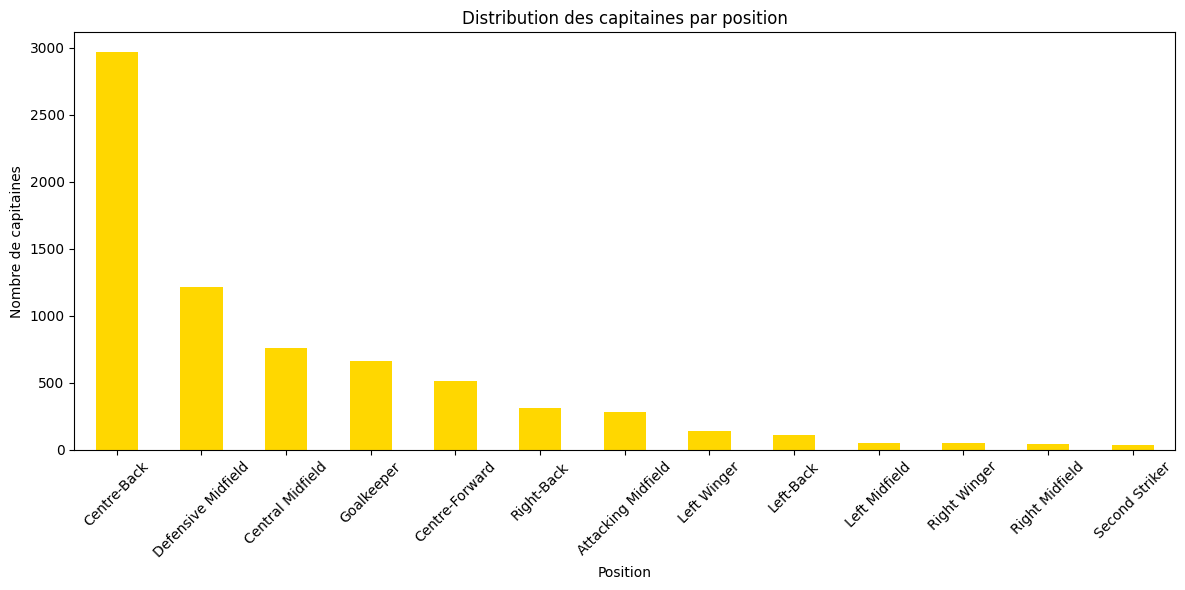

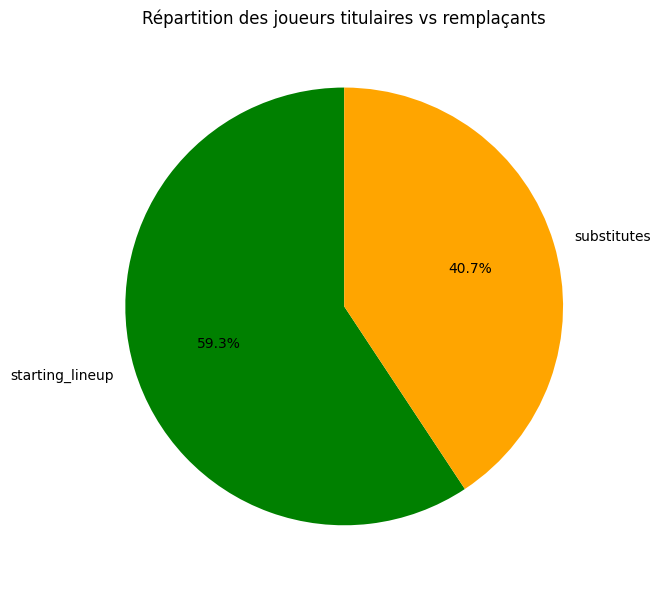

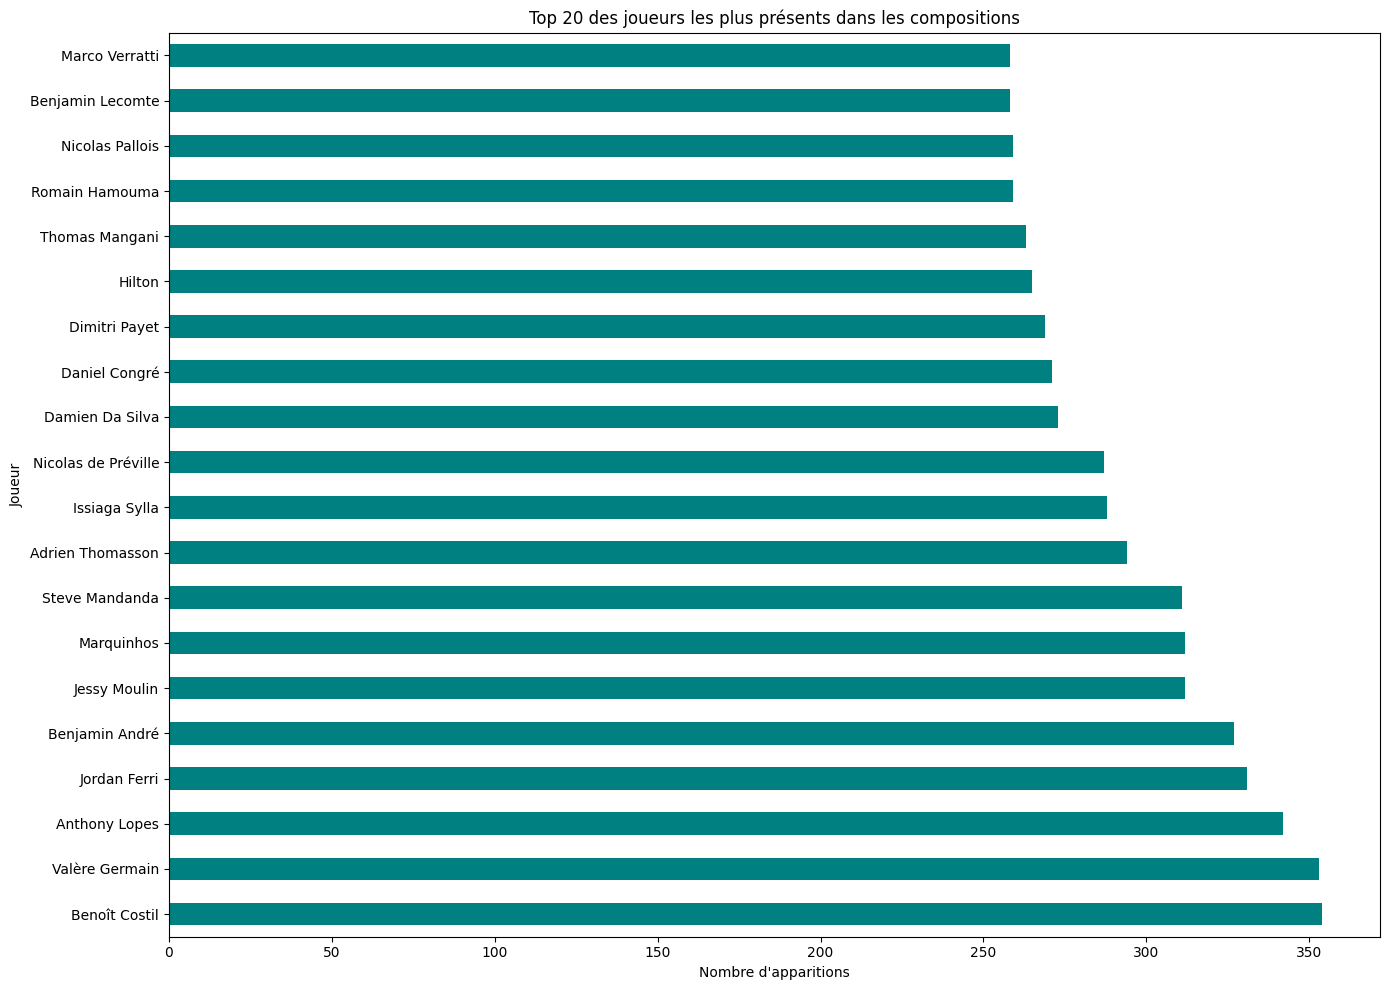

In [12]:
# -------------------------------------------------------------------------------
# PARTIE 2: VISUALISATION DES DONNÉES
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("PARTIE 2: VISUALISATION DES DONNÉES")
print("="*80)

# -------------------------------------------------------------------------------
# 2.1 VISUALISATION DES DONNÉES DE COMPOSITION (df_lineups)
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("2.1 VISUALISATION DES DONNÉES DE COMPOSITION (df_lineups)")
print("="*80)

# Distribution des positions
plt.figure(figsize=(14, 8))
positions_count = df_lineups['position'].value_counts()
positions_count.plot(kind='bar', color='darkblue')
plt.title('Distribution des joueurs par position')
plt.xlabel('Position')
plt.ylabel('Nombre de joueurs')
plt.xticks(rotation=45)
plt.tight_layout()

# Évolution du nombre de matchs par date
plt.figure(figsize=(16, 6))
matches_per_date = df_lineups.groupby('date')['game_id'].nunique()
matches_per_date.plot(kind='line', marker='.', markersize=5)
plt.title('Nombre de matchs par jour')
plt.xlabel('Date')
plt.ylabel('Nombre de matchs')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Distribution des capitaines par position
plt.figure(figsize=(12, 6))
captain_positions = df_lineups[df_lineups['team_captain'] == 1]['position'].value_counts()
captain_positions.plot(kind='bar', color='gold')
plt.title('Distribution des capitaines par position')
plt.xlabel('Position')
plt.ylabel('Nombre de capitaines')
plt.xticks(rotation=45)
plt.tight_layout()

# Nombre de joueurs titulaires vs remplaçants
plt.figure(figsize=(10, 6))
player_types = df_lineups['type'].value_counts()
player_types.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.title('Répartition des joueurs titulaires vs remplaçants')
plt.ylabel('')
plt.tight_layout()

# Top 20 des joueurs les plus présents
top_players = df_lineups['player_name'].value_counts().head(20)
plt.figure(figsize=(14, 10))
top_players.plot(kind='barh', color='teal')
plt.title('Top 20 des joueurs les plus présents dans les compositions')
plt.xlabel('Nombre d\'apparitions')
plt.ylabel('Joueur')
plt.tight_layout()



2.2 VISUALISATION DES DONNÉES D'ÉVÉNEMENTS (df_events)


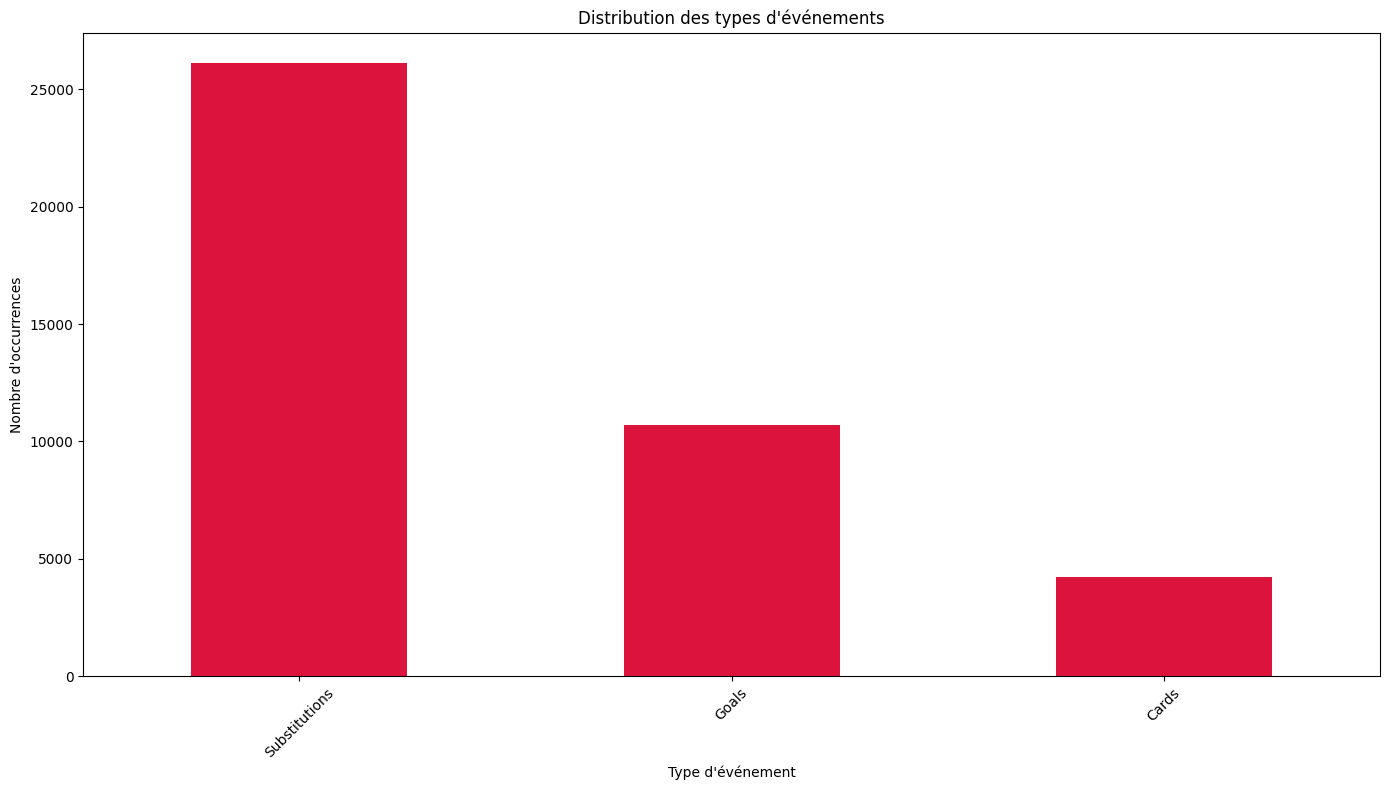

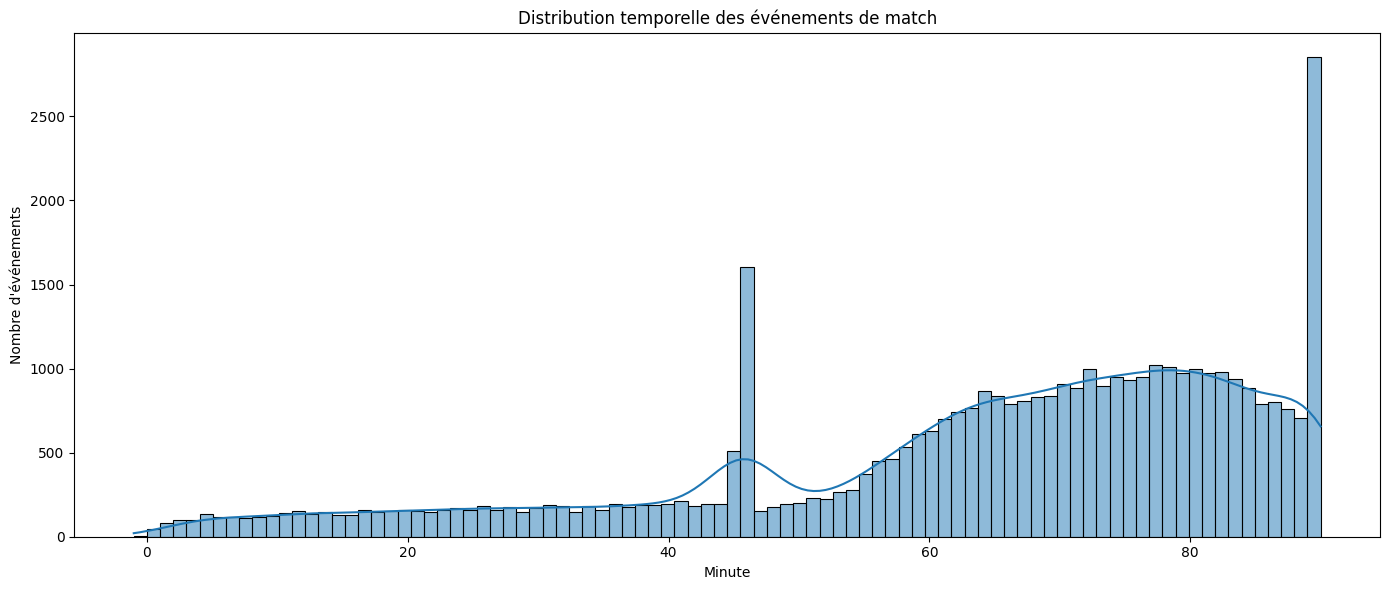

<Figure size 1600x1000 with 0 Axes>

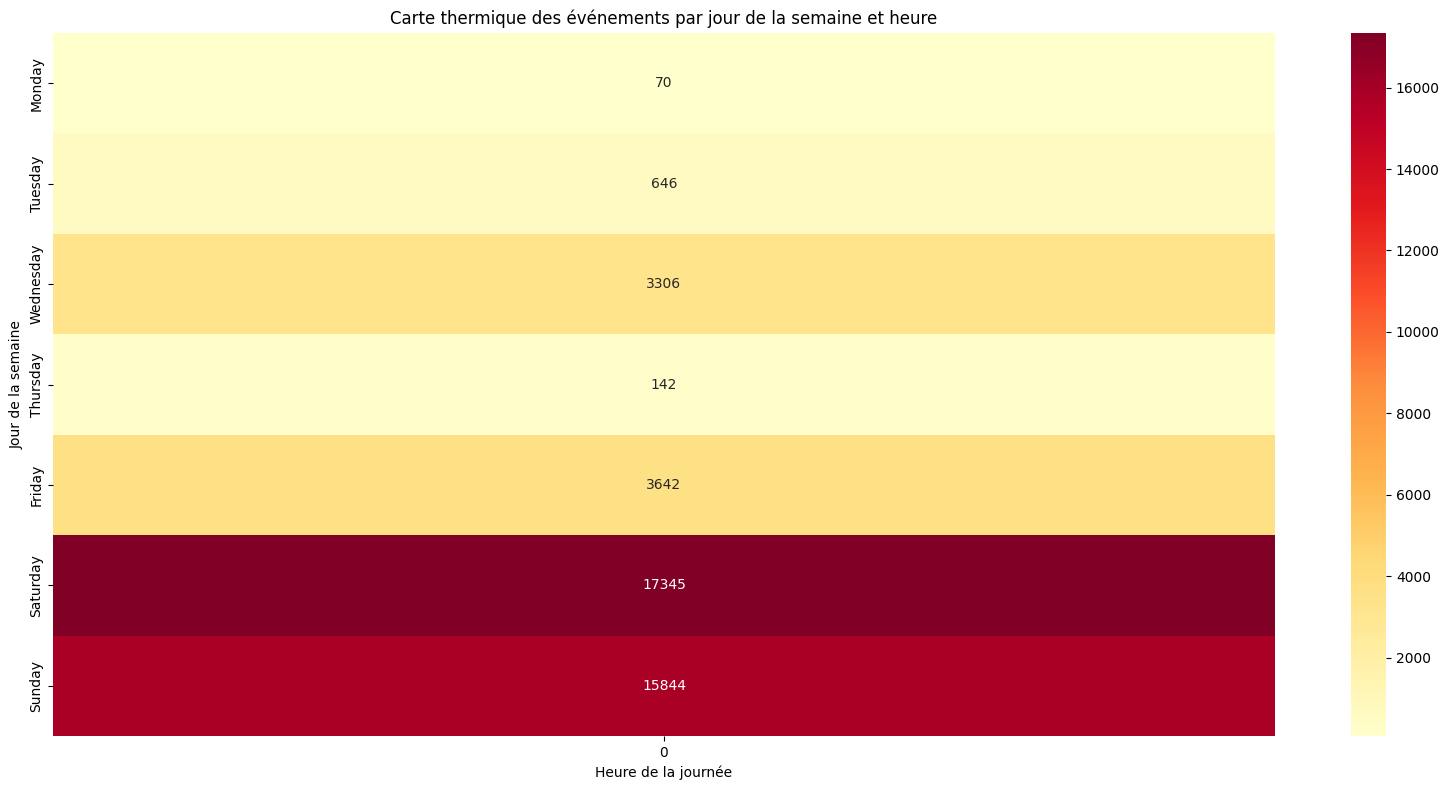

In [13]:
# -------------------------------------------------------------------------------
# 2.2 VISUALISATION DES DONNÉES D'ÉVÉNEMENTS (df_events)
# -------------------------------------------------------------------------------

print("\n" + "="*80)
print("2.2 VISUALISATION DES DONNÉES D'ÉVÉNEMENTS (df_events)")
print("="*80)

# Distribution des types d'événements
plt.figure(figsize=(14, 8))
event_types = df_events['type'].value_counts()
event_types.plot(kind='bar', color='crimson')
plt.title('Distribution des types d\'événements')
plt.xlabel('Type d\'événement')
plt.ylabel('Nombre d\'occurrences')
plt.xticks(rotation=45)
plt.tight_layout()


# Distribution temporelle des événements
plt.figure(figsize=(14, 6))
sns.histplot(df_events['minute'], bins=90, kde=True)
plt.title('Distribution temporelle des événements de match')
plt.xlabel('Minute')
plt.ylabel('Nombre d\'événements')
plt.tight_layout()


# Distribution temporelle par type d'événement
plt.figure(figsize=(16, 10))
main_events = ['Goal', 'Substitution', 'Yellow Card', 'Red Card']
event_data = df_events[df_events['type'].isin(main_events)]

if not event_data.empty:
    sns.histplot(data=event_data, x='minute', hue='type', bins=90, element='step', common_norm=False)
    plt.title('Distribution temporelle par type d\'événement')
    plt.xlabel('Minute')
    plt.ylabel('Nombre d\'événements')
    plt.tight_layout()


# Carte thermique des événements par jour de la semaine et heure
df_events['dow'] = df_events['date'].dt.day_name()
df_events['hour'] = pd.to_datetime(df_events['date']).dt.hour

dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

events_by_time = pd.crosstab(df_events['dow'], df_events['hour'])
events_by_time = events_by_time.reindex(dow_order)

plt.figure(figsize=(16, 8))
sns.heatmap(events_by_time, cmap='YlOrRd', annot=True, fmt='d')
plt.title('Carte thermique des événements par jour de la semaine et heure')
plt.xlabel('Heure de la journée')
plt.ylabel('Jour de la semaine')
plt.tight_layout()

# Top 20 des buteurs
if 'Goal' in df_events['type'].values:
    goal_scorers = df_events[df_events['type'] == 'Goal']['player_id'].value_counts().head(20)

    # Récupérer les noms des joueurs depuis df_lineups
    player_names = df_lineups[['player_id', 'player_name']].drop_duplicates().set_index('player_id')
    goal_scorers_named = pd.Series(index=[player_names.loc[pid, 'player_name'] if pid in player_names.index else f"Joueur {pid}"
                                         for pid in goal_scorers.index], data=goal_scorers.values)

    plt.figure(figsize=(14, 10))
    goal_scorers_named.plot(kind='barh', color='forestgreen')
    plt.title('Top 20 des buteurs')
    plt.xlabel('Nombre de buts')
    plt.ylabel('Joueur')
    plt.tight_layout()




2.3 VISUALISATIONS CROISÉES
Aucun but trouvé dans les données.
Aucun carton trouvé dans les données.

Toutes les visualisations croisées ont été générées et sauvegardées.


In [18]:
df_events.info()
df_lineups.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40995 entries, 0 to 40994
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        40995 non-null  int64         
 1   game_event_id     40995 non-null  object        
 2   date              40995 non-null  datetime64[ns]
 3   game_id           40995 non-null  int64         
 4   minute            40995 non-null  int64         
 5   type              40995 non-null  object        
 6   club_id           40995 non-null  int64         
 7   player_id         40995 non-null  int64         
 8   description       19667 non-null  object        
 9   player_in_id      26092 non-null  float64       
 10  player_assist_id  2268 non-null   float64       
 11  dow               40995 non-null  object        
 12  hour              40995 non-null  int32         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(5), object(4)
memory usage

## **II- Extraction des caractéristiques (Feature Engineering)**

Dans cette partie, on se focalise sur l’extraction des caractéristiques utiles et pertinentes, identifiées après l’exploration de chaque dataset.
L’objectif est de construire un petit data warehouse destiné à l’entraînement du modèle.

👉 Le script **ETL_Script.ipynb** illustre tout le processus :

Extraction,

Transformation,

et Chargement (ETL) des données.

Nous allons maintenant explorer ce dataset final **`finalDataWarehouse.csv`** afin de l’adapter à l'application du modèle.


## **III- Exploration du dataset final  `finalDataWarehouse.csv`**
🧹 **1. Statistiques descriptives**  
Vue d'ensemble des matches et des résultats.

**📈 2. Analyse des corrélations**  
Matrices de corrélations et relations avec la variable cible.

🔗 **3. Préparation des données**  
Nettoyage, transformation et enrichissement du data warehouse.

📊 **4. Analyse multivariée**  
Relations entre les principales variables et les résultats.

📆 **5. Analyse temporelle**  
Tendances et patterns saisonniers.

💰 **6. Analyse des variables financières et sportives**  
Impact des valeurs marchandes et de l'efficacité offensive.

📉 **7. Analyse des composantes principales (PCA)**  
Réduction de dimension et identification des facteurs explicatifs.

## III-1. STATISTIQUES DESCRIPTIVES

In [29]:
df = pd.read_csv(base_path + "finalDataWarehouse.csv")
# 1. STATISTIQUES DESCRIPTIVES
# ----------------------------

def print_descriptive_stats():
    """Affiche les statistiques descriptives principales"""
    print("STATISTIQUES DESCRIPTIVES DU DATAWAREHOUSE")
    print("=" * 50)

    # Statistiques globales
    print(f"Nombre total de matchs: {len(df)}")
    print(f"Nombre de saisons: {df['season'].nunique()}")

    # Statistiques des résultats
    result_counts = df['results'].value_counts()
    print("\nDistribution des résultats:")
    for result, count in result_counts.items():
        print(f"  {result}: {count} matchs ({count/len(df)*100:.1f}%)")

    # Statistiques des buts
    print(f"\nMoyenne des buts par match: {df['total_goals'].mean():.2f}")
    print(f"Moyenne des buts à domicile: {df['home_club_goals'].mean():.2f}")
    print(f"Moyenne des buts à l'extérieur: {df['away_club_goals'].mean():.2f}")

    # Top équipes à domicile
    top_home = df.groupby('home_club_name')['home_club_goals'].agg(['count', 'mean']).sort_values('mean', ascending=False)
    print("\nTop 5 équipes les plus prolifiques à domicile:")
    print(top_home.head(5))

    # Performance variable cible par saison
    seasonal_results = df.groupby(['season', 'results']).size().unstack().fillna(0)
    seasonal_results = seasonal_results.div(seasonal_results.sum(axis=1), axis=0) * 100
    print("\nÉvolution des résultats par saison (%):")
    print(seasonal_results.round(1))
print_descriptive_stats()

STATISTIQUES DESCRIPTIVES DU DATAWAREHOUSE
Nombre total de matchs: 4078
Nombre de saisons: 12

Distribution des résultats:
  1: 1802 matchs (44.2%)
  -1: 1203 matchs (29.5%)
  0: 1073 matchs (26.3%)

Moyenne des buts par match: 2.62
Moyenne des buts à domicile: 1.48
Moyenne des buts à l'extérieur: 1.14

Top 5 équipes les plus prolifiques à domicile:
                                              count      mean
home_club_name                                               
Paris Saint-Germain Football Club               204  2.710784
Olympique Lyonnais                              203  1.990148
Association sportive de Monaco Football Club    185  1.951351
Olympique de Marseille                          204  1.720588
Racing Club de Lens                              76  1.552632

Évolution des résultats par saison (%):
results    -1     0     1
season                   
2012     25.3  29.5  45.3
2013     27.2  28.2  44.6
2014     28.9  25.3  45.8
2015     29.4  27.8  42.8
2016     25.9  25

## III-2. ANALYSE DES CORRÉLATIONS




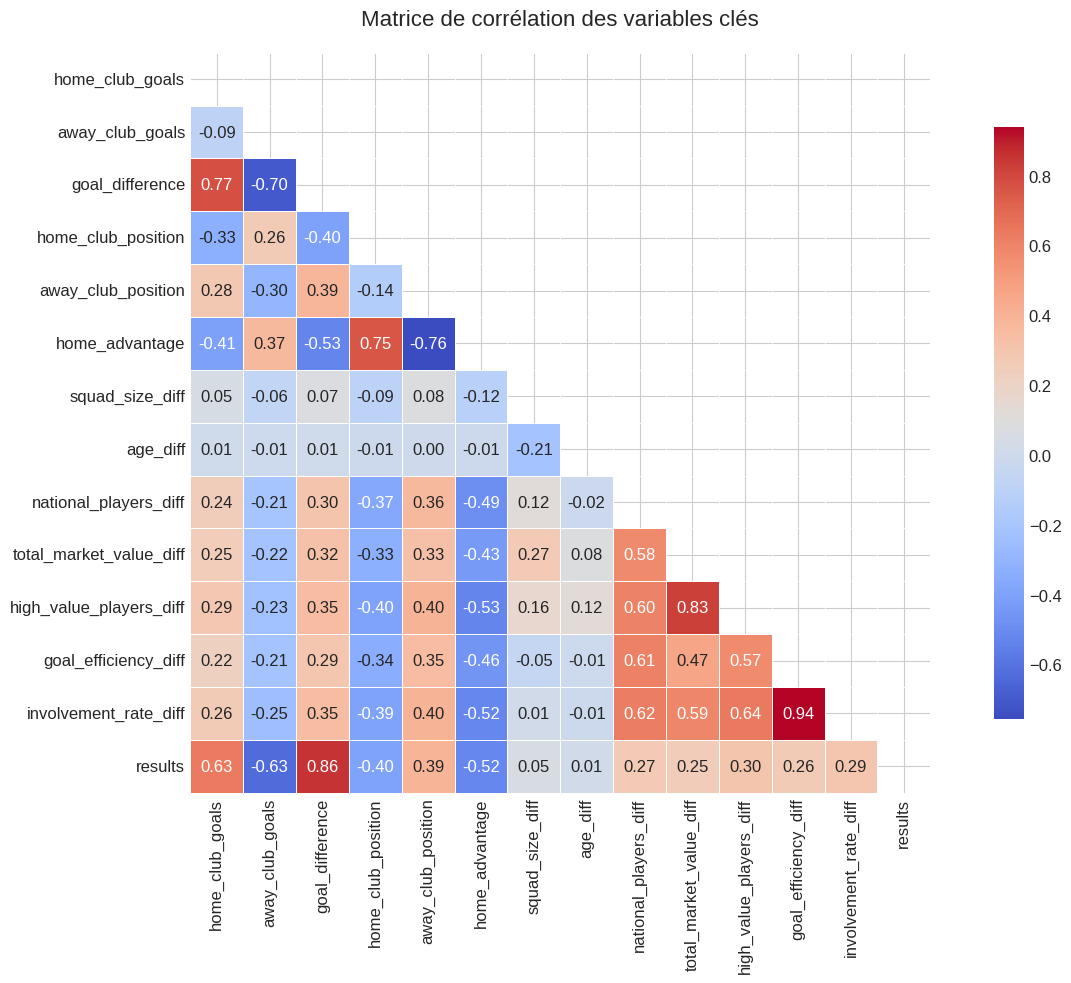


Variables les plus corrélées avec results:
results                    1.000000
goal_difference            0.855620
home_club_goals            0.631402
away_club_position         0.392833
high_value_players_diff    0.297909
involvement_rate_diff      0.294428
national_players_diff      0.267065
goal_efficiency_diff       0.257956
total_market_value_diff    0.254649
squad_size_diff            0.054359
age_diff                   0.014313
home_club_position        -0.395606
home_advantage            -0.522036
away_club_goals           -0.632213
Name: results, dtype: float64


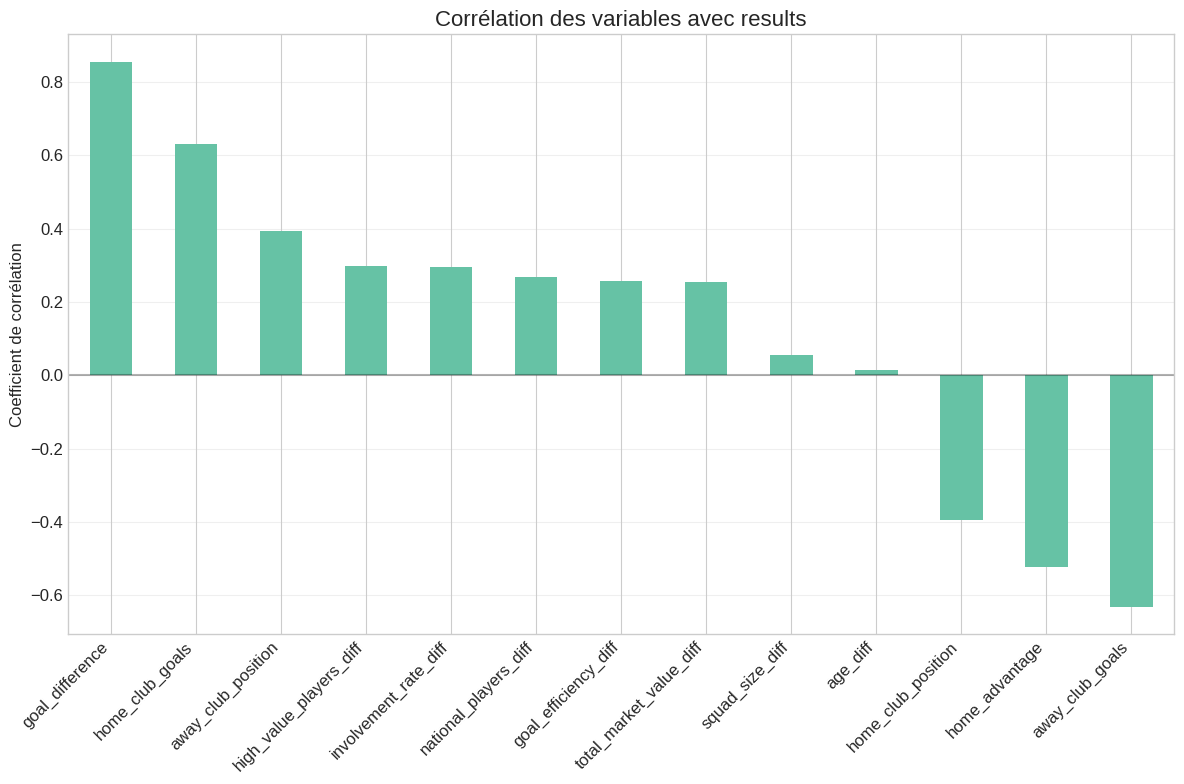

In [33]:
# 2. ANALYSE DES CORRÉLATIONS
# ---------------------------

def plot_correlation_matrix(target_var='results'):
    """
    Affiche la matrice de corrélation pour les variables numériques sélectionnées
    et montre les variables les plus corrélées avec la variable cible.
    """
    # Sélection des variables importantes pour la matrice de corrélation
    key_vars = [
        'home_club_goals', 'away_club_goals', 'goal_difference',
        'home_club_position', 'away_club_position', 'home_advantage',
        'squad_size_diff', 'age_diff', 'national_players_diff',
        'total_market_value_diff', 'high_value_players_diff',
        'goal_efficiency_diff', 'involvement_rate_diff', target_var
    ]

    # Vérifier si toutes les colonnes existent dans le dataset
    missing_vars = [var for var in key_vars if var not in df.columns]
    if missing_vars:
        print(f"Attention : Les variables suivantes sont absentes : {missing_vars}")
        key_vars = [var for var in key_vars if var in df.columns]

    # Calcul de la matrice de corrélation
    corr_matrix = df[key_vars].corr()

    # Création du heatmap
    plt.figure(figsize=(14, 10))
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, linewidths=0.5, cbar_kws={"shrink": .8})
    plt.title('Matrice de corrélation des variables clés', fontsize=16, pad=20)
    plt.tight_layout()
    plt.savefig('correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Corrélations avec la variable cible
    target_corr = corr_matrix[target_var].sort_values(ascending=False)
    print(f"\nVariables les plus corrélées avec {target_var}:")
    print(target_corr)

    # Visualisation des corrélations avec la variable cible
    plt.figure(figsize=(12, 8))
    target_corr = target_corr.drop(target_var)  # Supprimer la corrélation avec elle-même
    target_corr.plot(kind='bar')
    plt.title(f'Corrélation des variables avec {target_var}', fontsize=16)
    plt.grid(axis='y', alpha=0.3)
    plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
    plt.ylabel('Coefficient de corrélation')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Exécuter l'analyse
plot_correlation_matrix()

## III-3. Préparation des données





In [45]:
df_to_clean=df.copy()
# Supprimer la colonne 'date'
df_to_clean.drop(columns=['date'], inplace=True)
print(df_to_clean.isna().sum())
print(df_to_clean.isnull().sum())
print(df_to_clean.duplicated().sum())
print("\n" + "="*80)
print("Aucune valeur nulle,nan ou dupliquer à traiter")
print("="*80)

game_id                       0
season                        0
home_club_id                  0
away_club_id                  0
home_club_name                0
away_club_name                0
home_club_goals               0
away_club_goals               0
goal_difference               0
total_goals                   0
home_advantage                0
month                         0
day_of_week                   0
home_club_position            0
away_club_position            0
results                       0
home_squad_size               0
home_average_age              0
home_national_team_players    0
home_stadium_seats            0
home_net_transfer_value       0
away_squad_size               0
away_average_age              0
away_national_team_players    0
away_stadium_seats            0
away_net_transfer_value       0
squad_size_diff               0
age_diff                      0
national_players_diff         0
transfer_value_diff           0
home_team_encoded             0
away_tea

In [50]:
# Supprimer les colonnes inutiles
columns_to_drop = ['home_club_id', 'away_club_id', 'home_club_name', 'away_club_name']
df_to_clean= df_to_clean.drop(columns=columns_to_drop)
df_to_clean= df_to_clean.drop(columns='game_id')
df_to_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4078 entries, 0 to 4077
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   season                      4078 non-null   int64  
 1   home_club_goals             4078 non-null   int64  
 2   away_club_goals             4078 non-null   int64  
 3   goal_difference             4078 non-null   int64  
 4   total_goals                 4078 non-null   int64  
 5   home_advantage              4078 non-null   float64
 6   month                       4078 non-null   int64  
 7   day_of_week                 4078 non-null   int64  
 8   home_club_position          4078 non-null   float64
 9   away_club_position          4078 non-null   float64
 10  results                     4078 non-null   int64  
 11  home_squad_size             4078 non-null   int64  
 12  home_average_age            4078 non-null   float64
 13  home_national_team_players  4078 

In [51]:

# Feature Scaling
numerical_cols = df_to_clean.select_dtypes(include=['number']).columns
scaler = StandardScaler()
df_to_clean[numerical_cols] = scaler.fit_transform(df_to_clean[numerical_cols])

# Outlier Detection and Treatment (using IQR method)
def treat_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

for col in numerical_cols:
    df_to_clean = treat_outliers_iqr(df_to_clean, col)


results
 1    44.188328
-1    29.499755
 0    26.311918
Name: proportion, dtype: float64


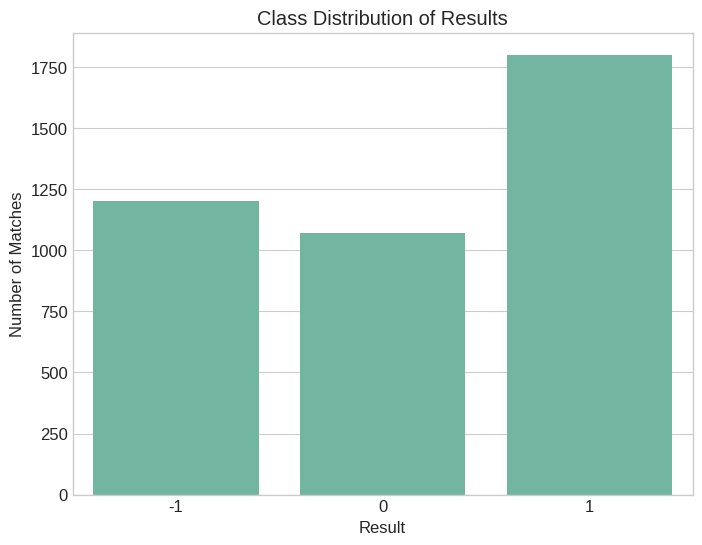

In [52]:
# prompt: Check for class balance in the target column results

# Check class balance in the 'results' column
result_counts = df['results'].value_counts(normalize=True) * 100
print(result_counts)

# Visualize class balance
plt.figure(figsize=(8, 6))
sns.countplot(x='results', data=df)
plt.title('Class Distribution of Results')
plt.xlabel('Result')
plt.ylabel('Number of Matches')
plt.show()
